In [1]:
from numpy import loadtxt
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib
import h5py
from numpy import expand_dims
import numpy as np
matplotlib.use("Agg")
import sys, os, numpy
import tensorflow
from qkeras.utils import load_qmodel
import argparse

2025-09-03 04:40:07.725723: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
os.environ['PATH'] = '/data/software/xilinx/Vitis_HLS/2023.2/bin/' + os.environ['PATH']
BACKEND = "Vitis"
N_PART_PER_JET = 10
N_FEAT = 14

In [3]:
import hls4ml

    I am making this work by creating dictionaries (variable ={}). Thus, the keyword for a respective dataset calls specific paths or objects. To see what's in the dictionary, just type its name and run the cell. Otherwise, `dictionary.keys()` also works, but it might not show subkeys.

In [4]:
dataLocations4c = {#"original":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/newTestDataST30.h5", 
                   "M_LLP_15_ctau_100":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/M_LLP_15_ctau_100/newTestDatapt20_Signal_Only_vDter_wEdits4eff.h5",
                   "M_LLP_30_ctau_1000":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/M_LLP_30_ctau_1000/newTestDatapt20_Signal_Only_vDter_wEdits4eff.h5", 
                   "M_LLP_30_ctau_100":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/M_LLP_30_ctau_100/newTestDatapt20_Signal_Only_vDter_wEdits4eff.h5",
                   "M_LLP_30_ctau_10": "/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/M_LLP_30_ctau_10/newTestDatapt20_Signal_Only_vDter_wEdits4eff.h5", 
                   "M_LLP_60_ctau_100":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/M_LLP_60_ctau_100/newTestDatapt20_Signal_Only_vDter_wEdits4eff.h5"
                   }

In [5]:
jetData4c = {#"original":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/newTestDataST30.h5", 
                   "M_LLP_15_ctau_100":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/M_LLP_15_ctau_100/newJetDatapt20_Signal_Only_vDter_wEdits4eff.h5",
                   "M_LLP_30_ctau_1000":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/M_LLP_30_ctau_1000/newJetDatapt20_Signal_Only_vDter_wEdits4eff.h5", 
                   "M_LLP_30_ctau_100":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/M_LLP_30_ctau_100/newJetDatapt20_Signal_Only_vDter_wEdits4eff.h5",
                   "M_LLP_30_ctau_10": "/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/M_LLP_30_ctau_10/newJetDatapt20_Signal_Only_vDter_wEdits4eff.h5", 
                   "M_LLP_60_ctau_100":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/M_LLP_60_ctau_100/newJetDatapt20_Signal_Only_vDter_wEdits4eff.h5"
                   }

In [6]:
# modelLocations4c = {"original":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/qkL1JetTagModel.h5",
#                     "M_LLP_15_ctau_100":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/M_LLP_15_ctau_100/M_LLP_15_ctau_100qkL1JetTagModel.h5",
#                     "M_LLP_30_ctau_1000":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/M_LLP_30_ctau_1000/M_LLP_30_ctau_1000qkL1JetTagModel.h5", 
#                     "M_LLP_30_ctau_100":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/M_LLP_30_ctau_100/M_LLP_30_ctau_100qkL1JetTagModel.h5", 
#                     "M_LLP_30_ctau_10": "/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/M_LLP_30_ctau_10/M_LLP_30_ctau_10qkL1JetTagModel.h5",
#                     "M_LLP_60_ctau_100":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/M_LLP_60_ctau_100/M_LLP_60_ctau_100qkL1JetTagModel.h5" }

In [7]:
modelLocations4c = {#"original":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/stop_4b_4c/noNorm_noSigmoid/noNorm/noNorm_train_qkL1JetTagModel.h5",
                    "M_LLP_15_ctau_100":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/stop_4b_4c/noNorm_noSigmoid/noNorm/noNorm_train_qkL1JetTagModel.h5",
                    "M_LLP_30_ctau_1000":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/stop_4b_4c/noNorm_noSigmoid/noNorm/noNorm_train_qkL1JetTagModel.h5", 
                    "M_LLP_30_ctau_100":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/stop_4b_4c/noNorm_noSigmoid/noNorm/noNorm_train_qkL1JetTagModel.h5", 
                    "M_LLP_30_ctau_10": "/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/stop_4b_4c/noNorm_noSigmoid/noNorm/noNorm_train_qkL1JetTagModel.h5",
                    "M_LLP_60_ctau_100":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/stop_4b_4c/noNorm_noSigmoid/noNorm/noNorm_train_qkL1JetTagModel.h5" }

In [8]:
keys4c = ["original", "M_LLP_15_ctau_100", "M_LLP_30_ctau_1000","M_LLP_30_ctau_100", "M_LLP_30_ctau_10", "M_LLP_60_ctau_100"]

    Only one sample of 4b tested so far.

In [9]:
dataLocations4b = {
    #"original":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/newTestDataST30.h5",
    "M_LLP_30_ctau_1":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/4b/M_LLP_30_ctau_1/newTestDatapt20_Signal_Only_vDter_wEdits4eff.h5",
    "M_LLP_30_ctau_10":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/4b/M_LLP_30_ctau_10/newTestDatapt20_Signal_Only_vDter_wEdits4eff.h5",
    "M_LLP_30_ctau_100":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/4b/M_LLP_30_ctau_100/newTestDatapt20_Signal_Only_vDter_wEdits4eff.h5",
    "M_LLP_30_ctau_1000":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/4b/M_LLP_30_ctau_1000/newTestDatapt20_Signal_Only_vDter_wEdits4eff.h5"
    }

In [10]:
# modelLocations4b = {
#                     "original":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/qkL1JetTagModel.h5",
#                     "M_LLP_30_ctau_1":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/4b/M_LLP_30_ctau_1/qkL1JetTagModel.h5",
#                     "M_LLP_30_ctau_10":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/4b/M_LLP_30_ctau_10/qkL1JetTagModel.h5",
#                     "M_LLP_30_ctau_100":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/4b/M_LLP_30_ctau_100/qkL1JetTagModel.h5",
#                     "M_LLP_30_ctau_1000":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/4b/M_LLP_30_ctau_1000/qkL1JetTagModel.h5"
#                     }

In [11]:
jetData4b = {
    #"original":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/newTestDataST30.h5",
    "M_LLP_30_ctau_1":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/4b/M_LLP_30_ctau_1/newJetDatapt20_Signal_Only_vDter_wEdits4eff.h5",
    "M_LLP_30_ctau_10":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/4b/M_LLP_30_ctau_10/newJetDatapt20_Signal_Only_vDter_wEdits4eff.h5",
    "M_LLP_30_ctau_100":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/4b/M_LLP_30_ctau_100/newJetDatapt20_Signal_Only_vDter_wEdits4eff.h5",
    "M_LLP_30_ctau_1000":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/4b/M_LLP_30_ctau_1000/newJetDatapt20_Signal_Only_vDter_wEdits4eff.h5"
    }

In [12]:
modelLocations4b = {
                    #"original":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/stop_4b_4c/noNorm_noSigmoid/noNorm/noNorm_train_qkL1JetTagModel.h5",
                    "M_LLP_30_ctau_1":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/stop_4b_4c/noNorm_noSigmoid/noNorm/noNorm_train_qkL1JetTagModel.h5",
                    "M_LLP_30_ctau_10":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/stop_4b_4c/noNorm_noSigmoid/noNorm/noNorm_train_qkL1JetTagModel.h5",
                    "M_LLP_30_ctau_100":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/stop_4b_4c/noNorm_noSigmoid/noNorm/noNorm_train_qkL1JetTagModel.h5",
                    "M_LLP_30_ctau_1000":"/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_Scripts/stop_4b_4c/noNorm_noSigmoid/noNorm/noNorm_train_qkL1JetTagModel.h5"
                    }

In [13]:
keys4b = ["original", "M_LLP_30_ctau_1", "M_LLP_30_ctau_10", "M_LLP_30_ctau_100", "M_LLP_30_ctau_1000" ]

    Below I start the plotting. Do not change the bkgTestFile. This has the testing data with QCD jets we've been using.

In [14]:
bkgTestFile = "/home/users/russelld/L1JetTagDaniel/backgroundQCD/testingDatapt30QCD.h5"
bkgJetFile = "/home/users/russelld/L1JetTagDaniel/backgroundQCD/jetDatapt30QCD.h5"

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# 4c Sample Study

    The loop below iterates over the 4c samples by the keywords stored in the list keys4c. For 4b, make a new list `keys4b` with desired keys and change  4b to 4c everywhere in loop below.

In [48]:
results = {}
hls_results = {}
scores = {}
hls_scores = {}
llpFeats_scores4c ={}
llpFeats_HLSscores4c ={}

In [49]:
for i, keys in enumerate(dataLocations4c.keys()):
    if i == 1:break
    print(dataLocations4c[keys])
    
    with h5py.File(dataLocations4c[keys], "r") as hf:
        dataset = hf["Testing Data"][:]
    with h5py.File(jetData4c[keys], "r") as hf:
        sigJets4c = hf["Jet Data"][:]

    with h5py.File(bkgTestFile, "r") as hf:
        datasetQCD = hf["Testing Data"][:]
    with h5py.File(bkgJetFile, "r") as hf:
        jetQCD = hf["Jet Data"][:]

    # datasetQCD does not have the same shape now that I added LLP information,
    # I fill datasetQCD with 5 more zeros on each row
    fill_array_qcd = np.zeros((datasetQCD.shape[0], 5))
    datasetQCD = np.hstack((datasetQCD, fill_array_qcd ))

    #I do something similar for jet data
    fill_QCDjet_data = np.zeros((jetQCD.shape[0], 1))
    jetQCD = np.hstack((jetQCD, fill_QCDjet_data))

    # Assert shapes
    assert datasetQCD.shape[1] == dataset.shape[1] and sigJets4c.shape[1] == jetQCD.shape[1],\
     "Row shape mismatch. The shapes checked are {},{},{},{}.".format(datasetQCD.shape[1], dataset.shape[1], sigJets4c.shape[1],  jetQCD.shape[1] )
    
    #continue

    dataset = np.concatenate((dataset,datasetQCD)) #Stacking datasets on top of another
    jetInfo4c = np.concatenate((sigJets4c, jetQCD))
    fullData = np.concatenate((dataset, jetInfo4c), axis=1)
    np.random.shuffle(fullData) #shuffling rows
    dataset = fullData[0:,0:141]
    eventNum = fullData[:,141]
    LLPfeats = fullData[0:,142:146]
    jetInfo4c = fullData[0:,146:]

/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/M_LLP_15_ctau_100/newTestDatapt20_Signal_Only_vDter_wEdits4eff.h5


In [50]:
jetInfo4c.shape

(144857, 6)

In [51]:
dataset.shape, sigJets4c.shape, datasetQCD.shape, jetQCD.shape

((144857, 141), (28609, 6), (116248, 146), (116248, 6))

rows of dataset contain:
* [0,140) contains particle inside jets features
* [140] contains labels
* [141] contains event number
* [142, 146) contains LLP info $(P_T, \eta, \phi, mass)$

rows of jet data contain:
* [0, 4) $(P_T, \eta, \phi, mass)$
* [4] labels
* [5] event number

In [52]:
#Check if event numbers match in particle dataset and jet dataset
if np.allclose(jetInfo4c[:, -1], eventNum):
    print("Event numbers match.")

Event numbers match.


In [53]:
for keys in dataLocations4c.keys():
    print(dataLocations4c[keys])
    
    with h5py.File(dataLocations4c[keys], "r") as hf:
        dataset = hf["Testing Data"][:]
    with h5py.File(jetData4c[keys], "r") as hf:
        sigJets4c = hf["Jet Data"][:]

    with h5py.File(bkgTestFile, "r") as hf:
        datasetQCD = hf["Testing Data"][:]
    with h5py.File(bkgJetFile, "r") as hf:
        jetQCD = hf["Jet Data"][:]
    
    # datasetQCD does not have the same shape now that I added LLP information,
    # I fill datasetQCD with 5 more zeros on each row
    fill_array_qcd = np.zeros((datasetQCD.shape[0], 5))
    datasetQCD = np.hstack((datasetQCD, fill_array_qcd ))

    #I do something similar for jet data
    fill_QCDjet_data = np.zeros((jetQCD.shape[0], 1))
    jetQCD = np.hstack((jetQCD, fill_QCDjet_data))

    # Assert shapes
    assert datasetQCD.shape[1] == dataset.shape[1] and sigJets4c.shape[1] == jetQCD.shape[1],\
     "Row shape mismatch. The shapes checked are {},{},{},{}.".format(datasetQCD.shape[1], dataset.shape[1], sigJets4c.shape[1],  jetQCD.shape[1] )
    
    #continue

    dataset = np.concatenate((dataset,datasetQCD)) #Stacking datasets on top of another
    jetInfo4c = np.concatenate((sigJets4c, jetQCD))
    fullData = np.concatenate((dataset, jetInfo4c), axis=1)
    np.random.shuffle(fullData) #shuffling rows
    dataset = fullData[0:,0:141]
    eventNum= fullData[:, 141]
    LLPfeats4c = fullData[0:,142:146]
    jetInfo4c = fullData[0:,146:]

    A = dataset[:, 0 : len(dataset[0]) - 1]
    b = dataset[:, len(dataset[0]) - 1]
    #A = expand_dims(A, axis=3)
    A = A.reshape((A.shape[0], N_PART_PER_JET, N_FEAT))

    model = load_qmodel(modelLocations4c[keys])
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["binary_accuracy"])

    config = hls4ml.utils.config_from_keras_model(model, 
                                            granularity='name', 
                                            backend=BACKEND,
                                            default_precision = 'fixed<14,8, AP_TRN, AP_SAT>')
    print("-----------------------------------")

    config["LayerName"]["input_1"]["Precision"] = "fixed<12,6,AP_TRN, AP_SAT>"

    config["LayerName"]["q_input"]["Precision"] = "fixed<12,6, AP_TRN, AP_SAT>"

    config['LayerName']['q_conv1d']['ReuseFactor'] = 2
    config['LayerName']['q_conv1d']["Precision"]["accum"] = "fixed<14,8, AP_TRN, AP_SAT>"
    config['LayerName']['q_conv1d']["Precision"]["result"] = "fixed<14,8, AP_TRN, AP_SAT>"

    config["LayerName"]["q_activation"]["Precision"]["result"] = "ufixed<14,8, AP_TRN, AP_SAT>"

    config['LayerName']['q_conv1d_1']['ReuseFactor'] = 2
    config['LayerName']['q_conv1d_1']["Precision"]["accum"] = "fixed<16, 12, AP_TRN, AP_SAT>"
    config['LayerName']['q_conv1d_1']["Precision"]["result"] = "fixed<14, 8, AP_TRN, AP_SAT>"

    config["LayerName"]["q_activation_1"]["Precision"]["result"] = "ufixed<10,5, AP_TRN, AP_SAT>"

    config["LayerName"]["global_average_pooling1d"]["Precision"]["accum"] = "fixed<16,12, AP_TRN, AP_SAT>"
    config["LayerName"]["global_average_pooling1d"]["Precision"]["result"] = "fixed<14,8, AP_TRN, AP_SAT>"



    config['LayerName']['q_dense']["Precision"]["accum"] = "fixed<14, 10, AP_TRN, AP_SAT>"
    config['LayerName']['q_dense']["Precision"]["result"] = "fixed<14, 8, AP_TRN, AP_SAT>"


    #config["LayerName"]["q_activation_2"]["Precision"] = "auto"
    config["LayerName"]["q_activation_2"]["Precision"]["result"] = "ufixed<14, 8, AP_TRN, AP_SAT>"


    config['LayerName']['q_dense_1']["Precision"]["accum"] = "fixed<14, 10, AP_TRN, AP_SAT>"
    config['LayerName']['q_dense_1']["Precision"]["result"] = "fixed<14, 8, AP_TRN, AP_SAT>"

    hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                       output_dir='qkmodel/hls4ml_prj',
                                                       part='xcvu13p-flga2577-2-e')
    #HLS model prediction
    hls_model.compile()
    X_test = np.ascontiguousarray(A)

    
    if np.allclose( A , X_test) == False:
        f"\nERROR: A and X_test arrays are not the same! at loop key {keys}.  \n"
        break
        
    #hls prediction
    y_hls = hls_model.predict(X_test).ravel()
    hls_scores[keys] = { "eventNum": eventNum, "scores": y_hls, "labels": b,  "jetPt": jetInfo4c[:, 0], \
            "jetEta": jetInfo4c[:, 1], "jetPhi": jetInfo4c[:, 2], "jetMass": jetInfo4c[:,3]} 
            
    llpFeats_HLSscores4c[keys] = {"eventNum": eventNum, "scores": y_hls, "llpPt": LLPfeats4c[:,0], "llpEta": LLPfeats4c[:, 1], \
    "llpPhi": LLPfeats4c[:, 2], "llpMass": LLPfeats4c[:, 3]}

    #qkeras prediction
    y_qkeras = model.predict(A).ravel()
    scores[keys] = { "eventNum": eventNum, "scores": y_qkeras, "labels": b, "jetPt": jetInfo4c[:, 0], \
            "jetEta": jetInfo4c[:, 1], "jetPhi": jetInfo4c[:, 2], "jetMass": jetInfo4c[:,3]}

    llpFeats_scores4c[keys] =  {"eventNum": eventNum, "scores": y_qkeras, "llpPt": LLPfeats4c[:,0], "llpEta": LLPfeats4c[:, 1], \
    "llpPhi": LLPfeats4c[:, 2], "llpMass": LLPfeats4c[:, 3]}


    assert y_hls.shape == y_qkeras.shape, "prediction shapes are not the same."

    print("\n-----------------------------\n")

    print("shape qkeras {} and hls {}. ".format(y_qkeras.shape, y_hls.shape))

    print("\n-----------------------------\n")

    fpr, tpr, thresholds_Ab = roc_curve(b, y_qkeras)
    auc_val = auc(fpr, tpr) 
    results[keys] = {"tpr": tpr, "fpr": fpr, "auc": auc_val , "thr": thresholds_Ab }

    hls_fpr, hls_tpr, hls_thresholds_Ab = roc_curve(b, y_hls)
    hls_auc = auc(hls_fpr, hls_tpr)
    hls_results[keys] = {"tpr": hls_tpr, "fpr": hls_fpr, "auc": hls_auc, "thr": hls_thresholds_Ab}
    

/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/M_LLP_15_ctau_100/newTestDatapt20_Signal_Only_vDter_wEdits4eff.h5


Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_input, layer type: Activation, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_conv1d, layer type: QConv1D, input shapes: [[None, 10, 14]], output shape: [None, 10, 10]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_conv1d_1, layer type: QConv1D, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: global_average_pooling1d, layer type: GlobalAveragePooling1D, input shapes: [[None, 10, 10]], output shape: [None, 10]
Layer name: q_dense, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: q_activation_2, layer type: Activation, input shapes: [[None, 10]], output shape: [None,

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_input, layer type: Activation, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_conv1d, layer type: QConv1D, input shapes: [[None, 10, 14]], output shape: [None, 10, 10]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_conv1d_1, layer type: QConv1D, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: global_average_pooling1d, layer type: GlobalAveragePooling1D, input shapes: [[None, 10, 10]], output shape: [None, 10]
Layer name: q_dense, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: q_activation_2, layer type: Activation, input shapes: [[None, 10]], output shape: [None,

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_input, layer type: Activation, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_conv1d, layer type: QConv1D, input shapes: [[None, 10, 14]], output shape: [None, 10, 10]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_conv1d_1, layer type: QConv1D, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: global_average_pooling1d, layer type: GlobalAveragePooling1D, input shapes: [[None, 10, 10]], output shape: [None, 10]
Layer name: q_dense, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: q_activation_2, layer type: Activation, input shapes: [[None, 10]], output shape: [None,

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_input, layer type: Activation, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_conv1d, layer type: QConv1D, input shapes: [[None, 10, 14]], output shape: [None, 10, 10]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_conv1d_1, layer type: QConv1D, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: global_average_pooling1d, layer type: GlobalAveragePooling1D, input shapes: [[None, 10, 10]], output shape: [None, 10]
Layer name: q_dense, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: q_activation_2, layer type: Activation, input shapes: [[None, 10]], output shape: [None,

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_input, layer type: Activation, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_conv1d, layer type: QConv1D, input shapes: [[None, 10, 14]], output shape: [None, 10, 10]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_conv1d_1, layer type: QConv1D, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: global_average_pooling1d, layer type: GlobalAveragePooling1D, input shapes: [[None, 10, 10]], output shape: [None, 10]
Layer name: q_dense, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: q_activation_2, layer type: Activation, input shapes: [[None, 10]], output shape: [None,

In [54]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

    Below I make the plots for 4c samples since we are iterating over those paths above. Note that I am making them by calling respective keys individually, i.e., doing `plt.plot` for each sample.

In [55]:
from plotting import kinematics_plotter
%matplotlib inline

M_LLP_15_ctau_100 0
M_LLP_30_ctau_1000 1
M_LLP_30_ctau_100 2
M_LLP_30_ctau_10 3
M_LLP_60_ctau_100 4


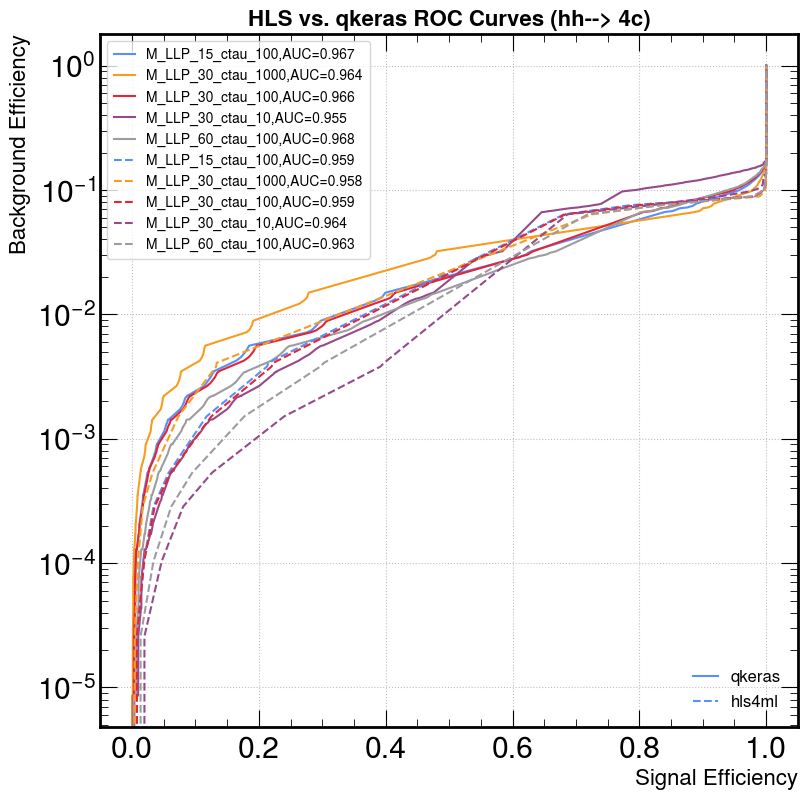

In [56]:
fig , ax = plt.subplots(figsize=(9, 9))
for key in results.keys():
    plt.plot(results[key]["tpr"], results[key]["fpr"],
            label="{},AUC={:.3f}".format(key, results[key]["auc"]))
plt.gca().set_prop_cycle(None)  # reset the colors
for i, key in enumerate(hls_results.keys()):
    print(key, i)
    #if i == 1: break
    plt.plot(hls_results[key]["tpr"], hls_results[key]["fpr"],
            label ="{},AUC={:.3f}".format(key, hls_results[key]["auc"]),
            linestyle ="--" )

plt.ylabel("Background Efficiency", fontsize=16)
plt.xlabel("Signal Efficiency", fontsize=16)
plt.title("HLS vs. qkeras ROC Curves (hh--> 4c)", fontsize=16, weight="bold")
plt.legend(loc="best", fontsize=10, frameon=True)
#plt.xscale("log")
plt.yscale("log")
plt.grid(True)

lines = [Line2D([0], [0], ls='-'), Line2D([0], [0], ls='--')]
from matplotlib.legend import Legend

leg = Legend(ax, lines, labels=['qkeras', 'hls4ml'], loc='lower right', frameon=False, fontsize=12)
ax.add_artist(leg)

plt.savefig("test4c.pdf", dpi=120)


### Plotting some things

In [57]:
import pandas as pd
import seaborn as sns

In [58]:
DF4c = pd.DataFrame.from_dict(scores, orient='index')
llpDF4c = pd.DataFrame.from_dict(llpFeats_scores4c, orient='index')

In [59]:
llpDF4c.index

Index(['M_LLP_15_ctau_100', 'M_LLP_30_ctau_1000', 'M_LLP_30_ctau_100',
       'M_LLP_30_ctau_10', 'M_LLP_60_ctau_100'],
      dtype='object')

In [60]:
#Explode all lists to achieve row-column format
explodedDF4c = DF4c.explode(['eventNum', 'scores', 'labels', 'jetPt', 'jetEta', 'jetPhi', 'jetMass'])
exploded_llpDF4c = llpDF4c.explode(['eventNum', 'scores', 'llpPt', 'llpEta', 'llpPhi', 'llpMass'])

In [61]:
df4c = explodedDF4c[explodedDF4c["labels"]==1] #DF to study signal only
llp4c = exploded_llpDF4c[explodedDF4c["labels"]==1]

In [62]:
"""code to extract ctau values from index string in the dataframe"""

i = 0
digit = "0123456789"
ctaus = []
for idx, rows in llp4c.iterrows():
    #if i == 3: break
    #i += 1
    #print(idx)
    ctau = []
    j = 0
    for c, char in enumerate(idx):
        if char == "_":
            j += 1
        if j == 4 and char in digit:
            ctau.extend(char)
    ctau = "".join(ctau)
    #print(ctau)
    ctau = int(ctau)
    ctaus.append(ctau)


In [63]:
llp4c["ctau"] = ctaus

/tmp/ipykernel_1264936/3110861133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llp4c["ctau"] = ctaus


In [64]:
llp4c["ctau"].value_counts()

ctau
100     60901
10      26798
1000    16784
Name: count, dtype: int64

[Text(0, 0, '100'), Text(1, 0, '10'), Text(2, 0, '1000')]

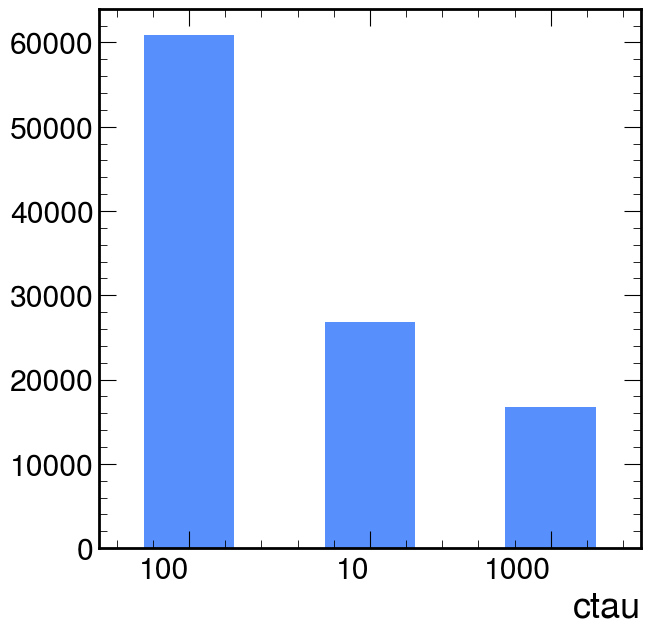

In [66]:
fig, ax = plt.subplots(figsize=(7,7))
llp4c["ctau"].value_counts().plot(kind="bar")
ax.set_xticklabels(llp4c["ctau"].value_counts().index, rotation=0, ha="right")

/tmp/ipykernel_1264936/146440399.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  llp4c["llpMass"][0]


15.000000000000243

<Axes: ylabel='Frequency'>

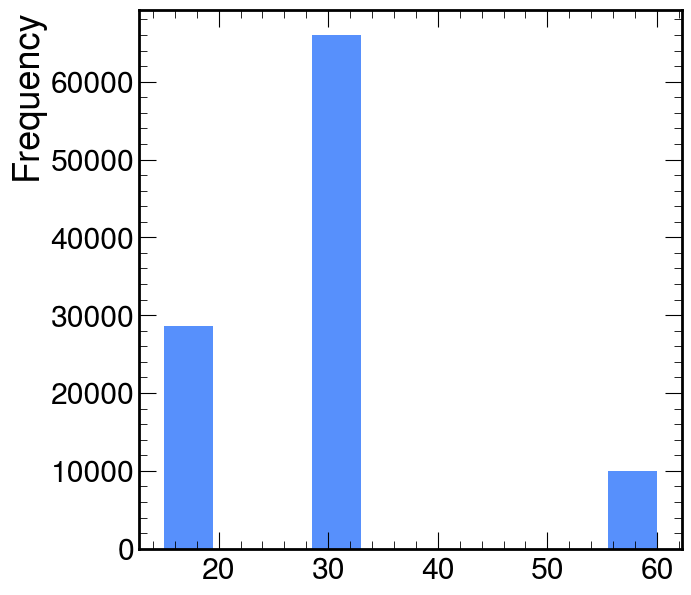

In [72]:
fig, ax = plt.subplots(figsize=(7,7))
llp4c["llpMass"].plot(kind="hist")
#ax.set_xticklabels(llp4c["llpMass"].value_counts().index, rotation=0, ha="right")

### kinematics

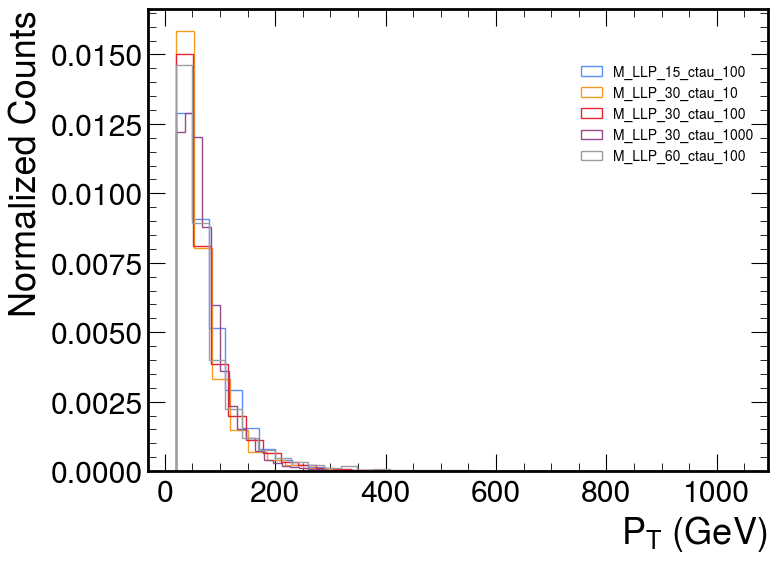

In [101]:
plt.figure(figsize=(8,6))

for idx, group in df4c.groupby(df4c.index):
  counts, bins, _ = plt.hist(
        group["jetPt"],
        bins=31,
        cumulative=False,
        density=True,
        histtype="step",
        label=str(idx), 
    )

plt.xlabel("$P_T$ (GeV)")
plt.ylabel("Normalized Counts")
plt.legend(title=" ", fontsize=10)
plt.show()

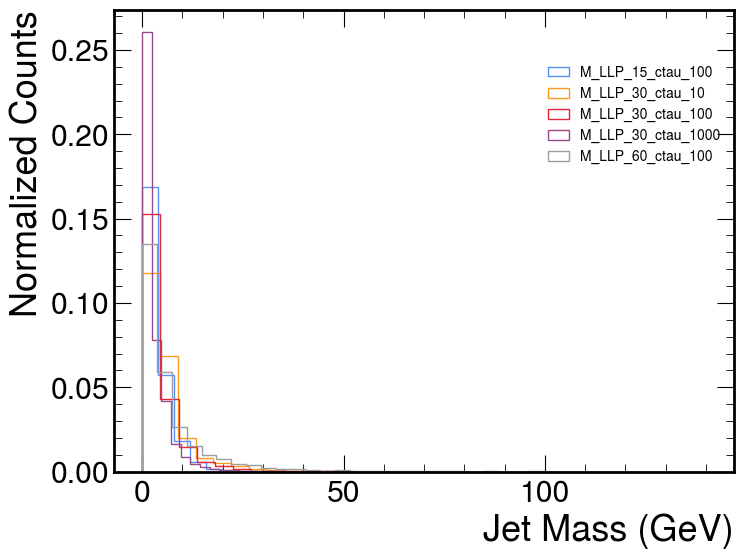

In [26]:
plt.figure(figsize=(8,6))

for idx, group in df4c.groupby(df4c.index):
  counts, bins, _ = plt.hist(
        group["jetMass"],
        bins=31,
        cumulative=False,
        density=True,
        histtype="step",
        label=str(idx), 
    )

plt.xlabel("Jet Mass (GeV)")
plt.ylabel("Normalized Counts")
plt.legend(title=" ", fontsize=10)
plt.show()

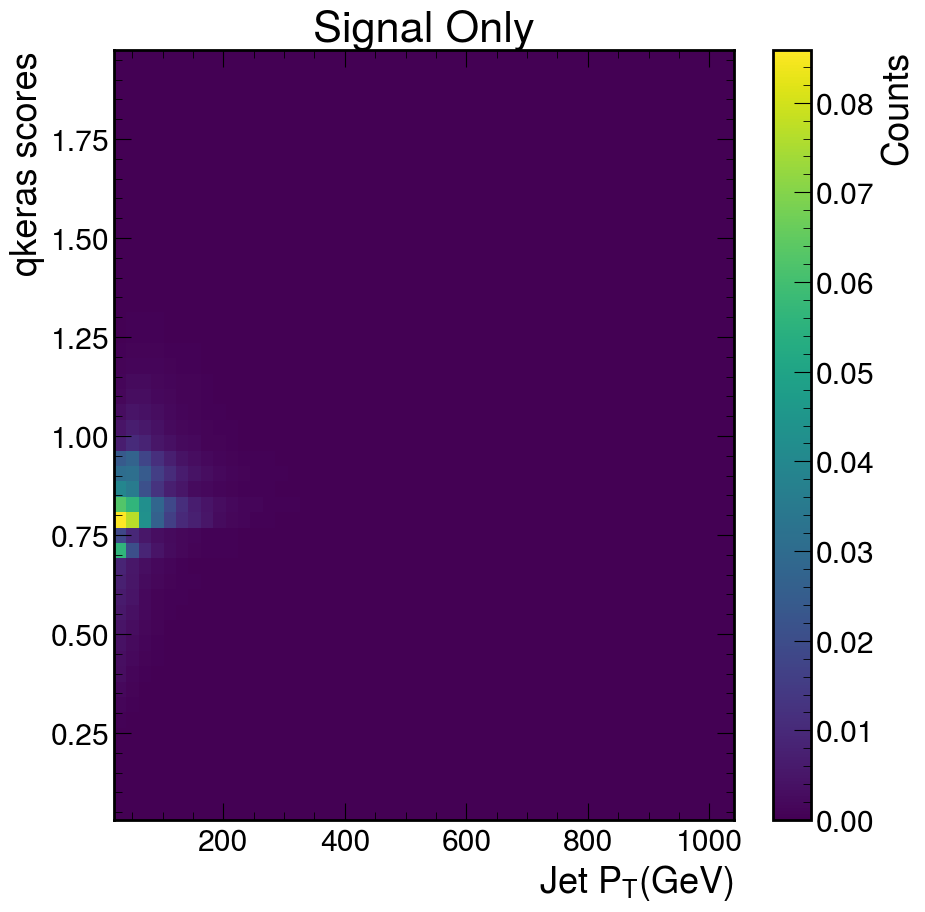

In [132]:
plt.hist2d(
        df4c["jetPt"], df4c["scores"],
        bins=[50, 50],
        cmap="viridis" ,
        density=True
        #norm = LogNorm()
    )
plt.colorbar(label="Counts")
plt.xlabel("Jet $P_T (GeV$)")
plt.ylabel("qkeras scores")
plt.title("Signal Only")
plt.show()

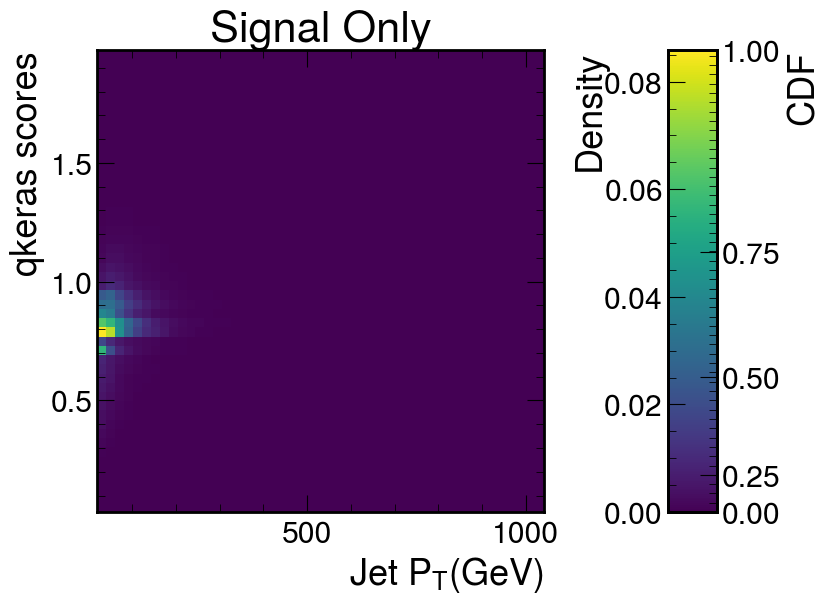

In [209]:
fig , ax = plt.subplots(figsize=(8, 6))

counts, x_edges, y_edges, img = plt.hist2d(
    df4c["jetPt"], df4c["scores"],
    bins=[50, 50],
    cmap="viridis" ,
    density=True
    #norm = LogNorm()
)

# 3. Calculate the CDF from the counts
# Flatten the counts array and calculate the cumulative sum

flattened_counts = counts.flatten()
sorted_counts = np.sort(flattened_counts)
cdf = np.cumsum(sorted_counts)

# Normalize the CDF to the range [0, 1]
cdf_normalized = cdf / cdf[-1]

# 4. Create the colorbar and plot the heatmap
# Use the hist2d output `img` as the mappable object
colorbar = plt.colorbar(img, fraction=0.08, pad=0.2)
#colorbar.set_label('Number of points in bin')

# 5. Create a secondary axis for the CDF labels
# Get the limits of the primary colorbar axis
cbar_ax = colorbar.ax
cbar_y_min, cbar_y_max = cbar_ax.get_ylim()
cbar_ax.set_xlabel("Density", rotation=90)
cbar_ax.xaxis.set_label_coords(-1.2, 1.0) #set this label at a specific location

# Create a secondary axis with a twin `Axes` object
cbar_ax2 = cbar_ax.twinx()
cbar_ax2.set_ylabel('CDF')

# The secondary ticks correspond to the sorted counts.
# We need to find the count values that correspond to specific CDF levels
# (e.g., 0.25, 0.50, 0.75, 1.0) for the new tick locations.
cdf_ticks = [0.0, 0.25, 0.50, 0.75, 1.0]
cdf_tick_positions = np.interp(cdf_ticks, cdf_normalized, sorted_counts)

# Scale the secondary axis to match the primary one
cbar_ax2.set_ylim(cbar_y_min, cbar_y_max)
cbar_ax2.set_yticks(cdf_tick_positions)
cbar_ax2.set_yticklabels([f'{t:.2f}' for t in cdf_ticks])


#plt.colorbar(label="Counts")
ax.set_xlabel("Jet $P_T (GeV$)")
ax.set_ylabel("qkeras scores")
ax.set_title("Signal Only")
plt.show()

In [275]:
counts[:,0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.20557703e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

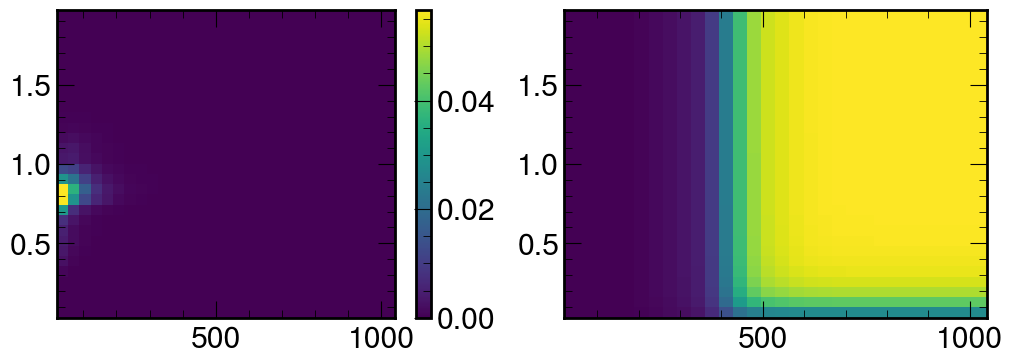

In [282]:
N = 200
x = np.random.randint(1900, 2020, N)
y = np.random.randint(1, 10, N)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
hist_vals, xbins, ybins, mesh = ax1.hist2d(
    df4c["jetPt"], df4c["scores"],
    bins=[30, 30],
    cmap="viridis" ,
    density=True)

ax2.pcolormesh(xbins, ybins, hist_vals.cumsum(axis=0).cumsum(axis=1))
plt.colorbar(mesh)
plt.show()


In [284]:
hist_vals.cumsum(axis=0).cumsum(axis=1)

array([[0.00000000e+00, 0.00000000e+00, 8.68015458e-05, 2.90785179e-04,
        1.04161855e-03, 3.32449921e-03, 6.64899841e-03, 1.07720718e-02,
        1.56893794e-02, 2.33496158e-02, 5.35912744e-02, 1.09960198e-01,
        1.66693689e-01, 1.95837308e-01, 2.08332390e-01, 2.12086557e-01,
        2.14968368e-01, 2.16309452e-01, 2.16891023e-01, 2.17116707e-01,
        2.17160107e-01, 2.17225209e-01, 2.17233889e-01, 2.17238229e-01,
        2.17238229e-01, 2.17238229e-01, 2.17238229e-01, 2.17242569e-01,
        2.17242569e-01, 2.17242569e-01],
       [0.00000000e+00, 0.00000000e+00, 9.54817004e-05, 3.60226415e-04,
        1.24560218e-03, 3.97551080e-03, 8.39804956e-03, 1.41573321e-02,
        2.07629298e-02, 3.13266779e-02, 6.87989052e-02, 1.54250687e-01,
        2.47171742e-01, 2.98033108e-01, 3.21308942e-01, 3.29177502e-01,
        3.35414193e-01, 3.38612830e-01, 3.40023355e-01, 3.40657007e-01,
        3.40839290e-01, 3.40986853e-01, 3.41025913e-01, 3.41034593e-01,
        3.41038933e-01,

In [108]:
counts.shape, x_edges.shape, y_edges.shape

((50, 50), (51,), (51,))

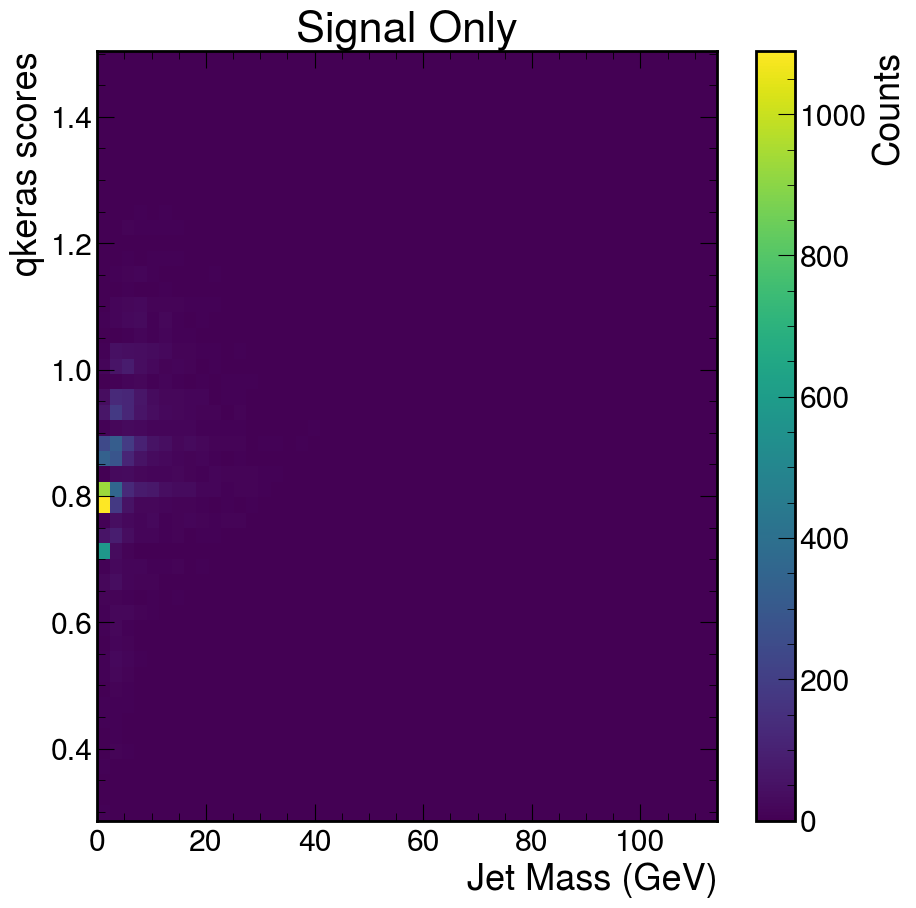

In [64]:
for idx, group in df4c.groupby(df4c.index):
   h = plt.hist2d(
        group["jetMass"], group["scores"],
        bins=[50, 50],
        cmap="viridis" ,
        #norm = LogNorm()
    )
plt.colorbar(label="Counts")
plt.xlabel("Jet Mass (GeV)")
plt.ylabel("qkeras scores")
plt.title("Signal Only")
plt.show()

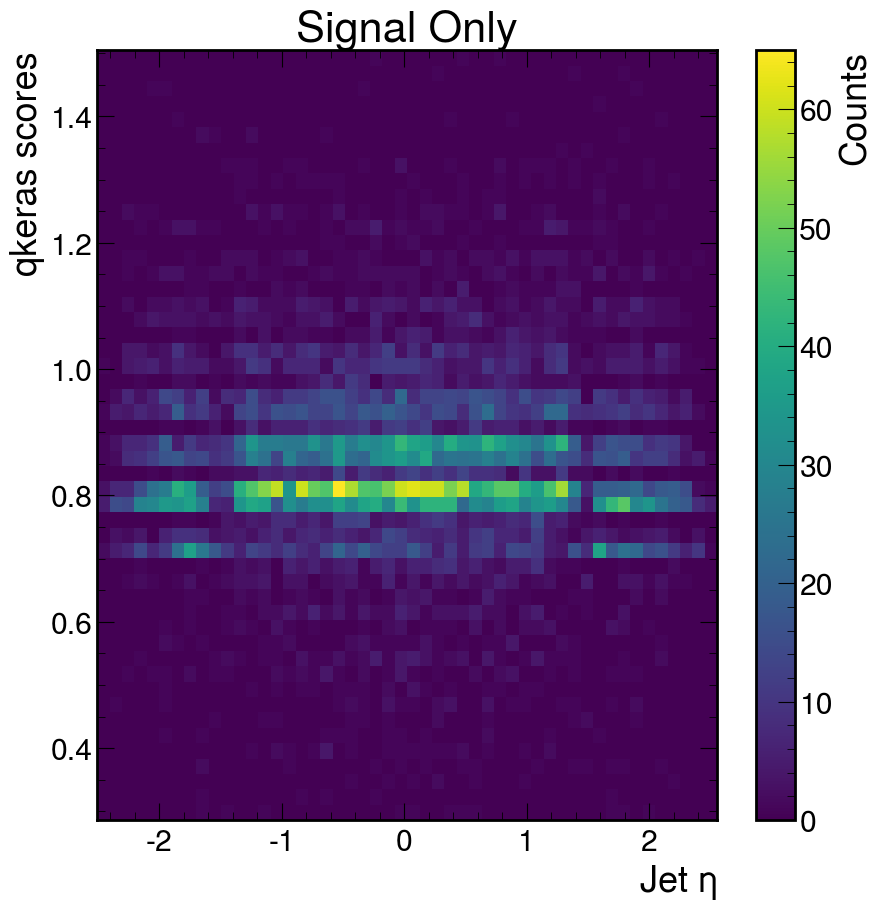

In [65]:
for idx, group in df4c.groupby(df4c.index):
   h = plt.hist2d(
        group["jetEta"], group["scores"],
        bins=[50, 50],
        cmap="viridis" ,
        #norm = LogNorm()
    )
plt.colorbar(label="Counts")
plt.xlabel("Jet $\eta$")
plt.ylabel("qkeras scores")
plt.title("Signal Only")
plt.show()

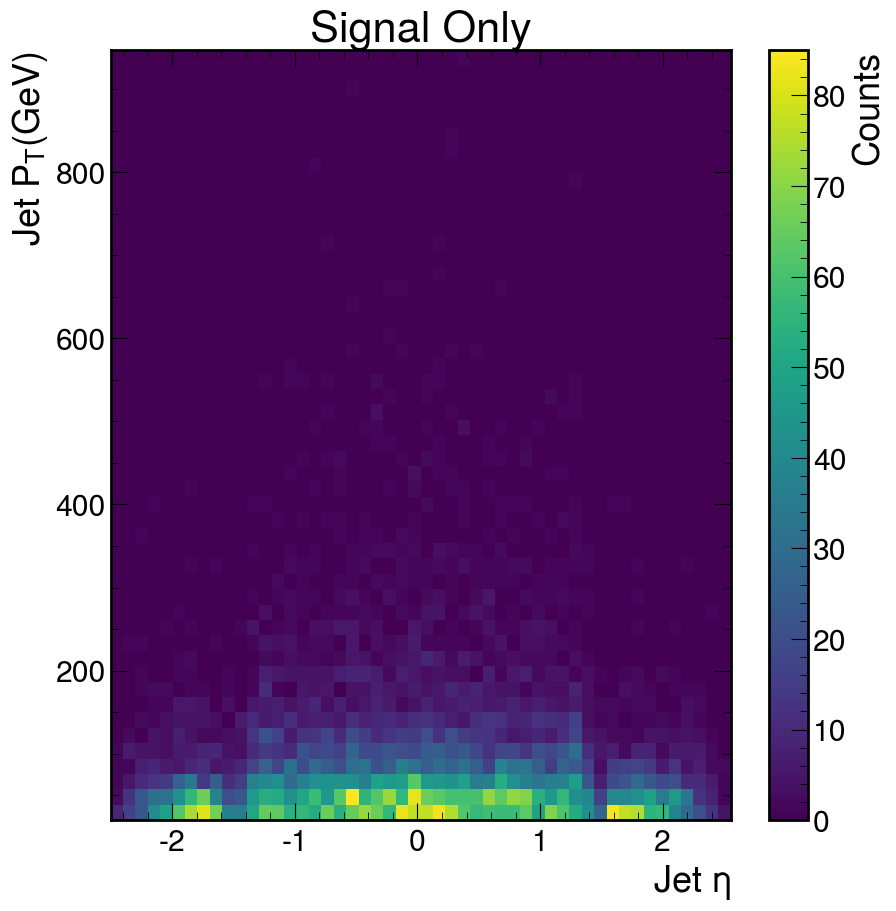

In [66]:
for idx, group in df4c.groupby(df4c.index):
   h = plt.hist2d(
        group["jetEta"], group["jetPt"],
        bins=[50, 50],
        cmap="viridis" ,
        #norm = LogNorm()
    )
plt.colorbar(label="Counts")
plt.xlabel("Jet $\eta$")
plt.ylabel("Jet $P_T (GeV)$")
plt.title("Signal Only")
plt.show()

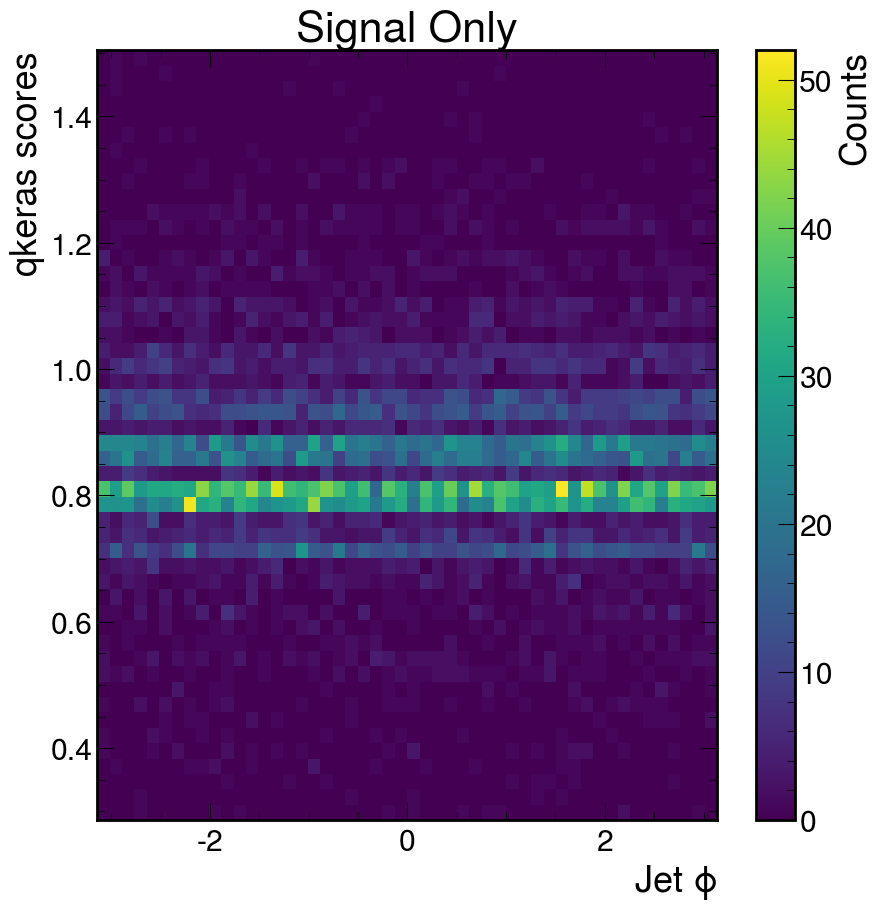

In [67]:
for idx, group in df4c.groupby(df4c.index):
   h = plt.hist2d(
        group["jetPhi"], group["scores"],
        bins=[50, 50],
        cmap="viridis" ,
        #norm = LogNorm()
    )
plt.colorbar(label="Counts")
plt.xlabel("Jet $\phi$")
plt.ylabel("qkeras scores")
plt.title("Signal Only")
plt.show()

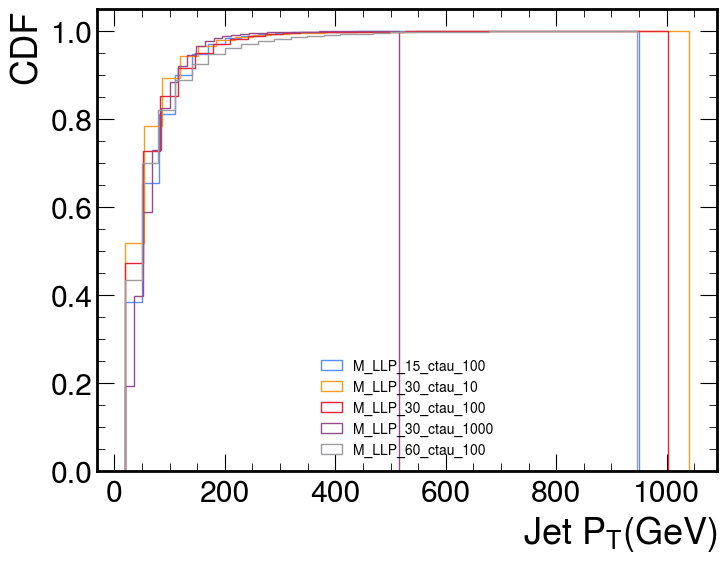

In [86]:
plt.figure(figsize=(8,6))

for idx, group in df4c.groupby(df4c.index):
    plt.hist(
        group["jetPt"],
        bins=31,
        cumulative=True,
        density=True,
        histtype="step",
        label=str(idx)
    )

plt.xlabel("Jet $ P_T (GeV)$")
plt.ylabel("CDF")
plt.legend(title=" ", fontsize=10)
plt.show()

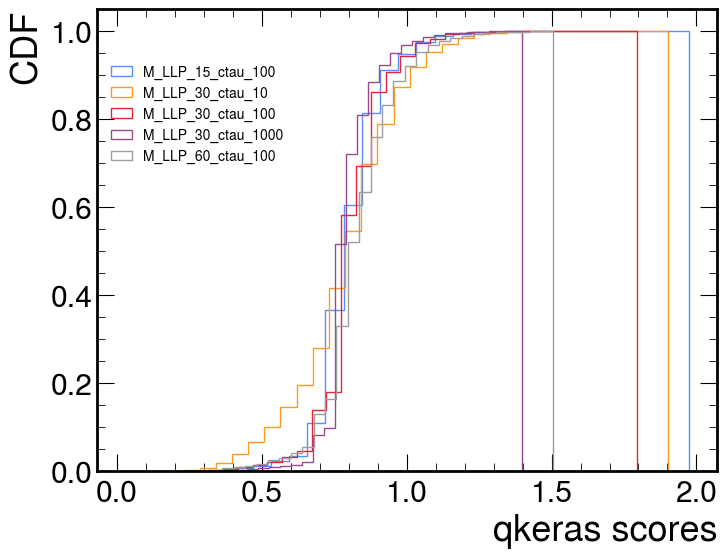

In [87]:
plt.figure(figsize=(8,6))

for idx, group in df4c.groupby(df4c.index):
    plt.hist(
        group["scores"],
        bins=31,
        cumulative=True,
        density=True,
        histtype="step",
        label=str(idx)
    )

plt.xlabel("qkeras scores")
plt.ylabel("CDF")
plt.legend(title=" ", fontsize=10)
plt.show()

### Based on the CDF above, apply a selection

Apply a selection at `qkeras_score >= 1.0` just to start (we need to find the correct LLP score based on the 14kHz rate, for example). Based on the CDF, we are accepting (keeping a proportion of data that has) `< 20%` total amount of jets. The results are shown below...

In [89]:
llpScore1_df4c = df4c.loc[df4c["scores"] >= 1.0]

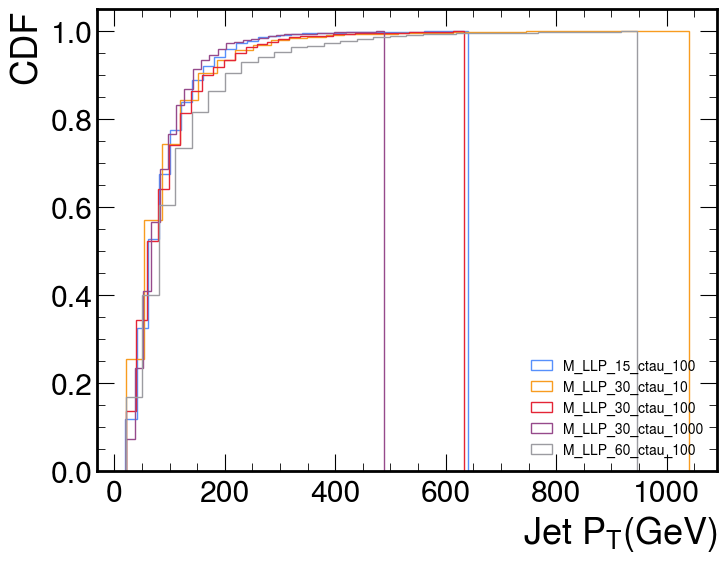

In [90]:
plt.figure(figsize=(8,6))

for idx, group in llpScore1_df4c.groupby(llpScore1_df4c.index):
    plt.hist(
        group["jetPt"],
        bins=31,
        cumulative=True,
        density=True,
        histtype="step",
        label=str(idx)
    )

plt.xlabel("Jet $P_T (GeV)$")
plt.ylabel("CDF")
plt.legend(title=" ", fontsize=10)
plt.show()

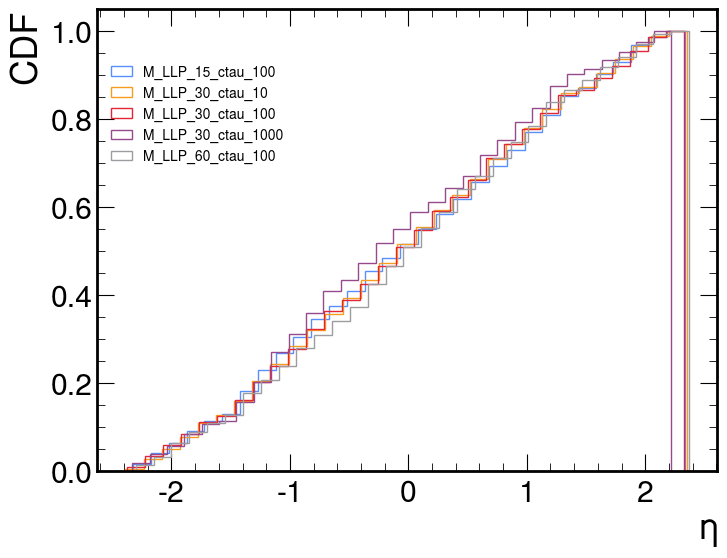

In [91]:
plt.figure(figsize=(8,6))

for idx, group in llpScore1_df4c.groupby(llpScore1_df4c.index):
    plt.hist(
        group["jetEta"],
        bins=31,
        cumulative=True,
        density=True,
        histtype="step",
        label=str(idx)
    )

plt.xlabel("$\eta$")
plt.ylabel("CDF")
plt.legend(title=" ", fontsize=10)
plt.show()

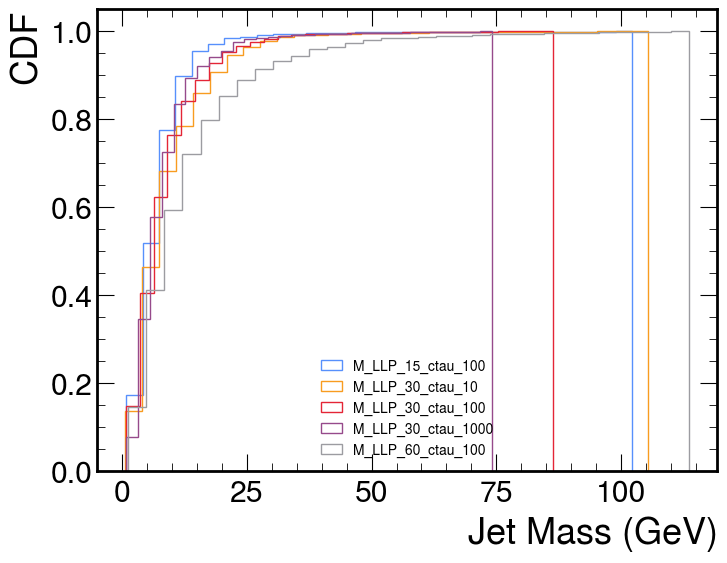

In [92]:
plt.figure(figsize=(8,6))

for idx, group in llpScore1_df4c.groupby(llpScore1_df4c.index):
    plt.hist(
        group["jetMass"],
        bins=31,
        cumulative=True,
        density=True,
        histtype="step",
        label=str(idx)
    )

plt.xlabel("Jet Mass $ (GeV)$")
plt.ylabel("CDF")
plt.legend(title=" ", fontsize=10)
plt.show()

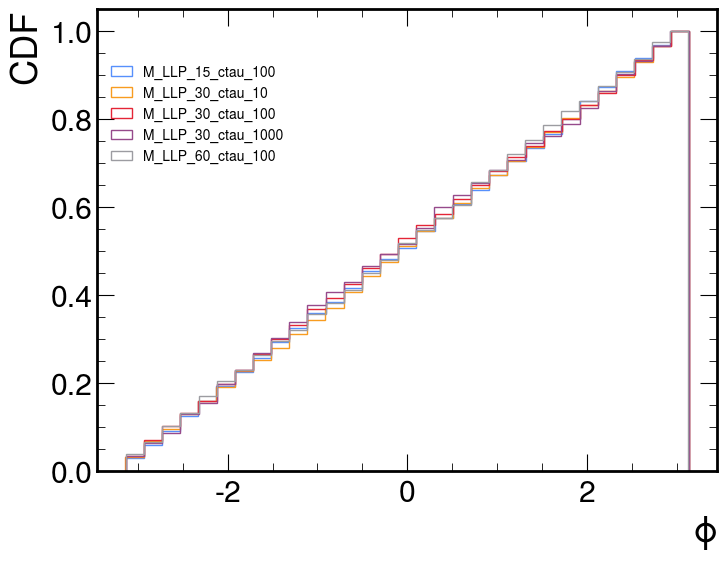

In [93]:
plt.figure(figsize=(8,6))

for idx, group in llpScore1_df4c.groupby(llpScore1_df4c.index):
    plt.hist(
        group["jetPhi"],
        bins=31,
        cumulative=True,
        density=True,
        histtype="step",
        label=str(idx)
    )

plt.xlabel("$\phi$")
plt.ylabel("CDF")
plt.legend(title=" ", fontsize=10)
plt.show()

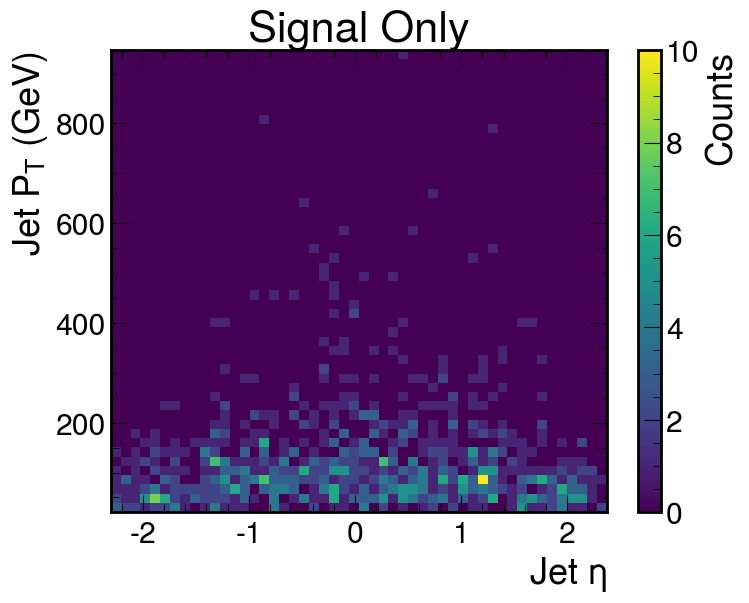

In [94]:
plt.figure(figsize=(8,6))

for idx, group in llpScore1_df4c.groupby(llpScore1_df4c.index):
   h = plt.hist2d(
        group["jetEta"], group["jetPt"],
        bins=[50, 50],
        cmap="viridis" ,
        #norm = LogNorm()
    )
plt.colorbar(label="Counts")
plt.xlabel("Jet $\eta$")
plt.ylabel("Jet $P_T $ (GeV)")
plt.title("Signal Only")
plt.show()

# 4b Sample Study

In [16]:
results4b = {}
hls_results4b = {}
scores4b = {}
hls_scores4b = {}
llpFeats_scores4b ={}
llpFeats_HLSscores4b ={}

In [18]:
for i, keys in enumerate(dataLocations4b.keys()):
    
    print(dataLocations4b[keys])

    with h5py.File(dataLocations4b[keys], "r") as hf:
        dataset = hf["Testing Data"][:]
    with h5py.File(jetData4b[keys], "r") as hf:
        sigJets4b = hf["Jet Data"][:]

    with h5py.File(bkgTestFile, "r") as hf:
        datasetQCD = hf["Testing Data"][:]
    with h5py.File(bkgJetFile, "r") as hf:
        jetQCD = hf["Jet Data"][:]
    
    
    #continue

    # datasetQCD does not have the same shape now that I added LLP information,
    # I fill datasetQCD with 5 more zeros on each row
    fill_array_qcd = np.zeros((datasetQCD.shape[0], 5))
    datasetQCD = np.hstack((datasetQCD, fill_array_qcd ))

    #I do something similar for jet data
    fill_QCDjet_data = np.zeros((jetQCD.shape[0], 1))
    jetQCD = np.hstack((jetQCD, fill_QCDjet_data))

    # Assert shapes
    assert datasetQCD.shape[1] == dataset.shape[1] and sigJets4b.shape[1] == jetQCD.shape[1],\
     "Row shape mismatch. The shapes checked are {},{},{},{}.".format(datasetQCD.shape[1], dataset.shape[1], sigJets4c.shape[1],  jetQCD.shape[1] )
    
    #continue

    dataset = np.concatenate((dataset,datasetQCD)) #Stacking datasets on top of another
    jetInfo4b = np.concatenate((sigJets4b, jetQCD))
    fullData = np.concatenate((dataset, jetInfo4b), axis=1)
    np.random.shuffle(fullData) #shuffling rows
    dataset = fullData[0:,0:141]
    LLPfeats = fullData[0:,141:146]
    jetInfo4c = fullData[0:,146:]

/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/4b/M_LLP_30_ctau_1/newTestDatapt20_Signal_Only_vDter_wEdits4eff.h5
/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/4b/M_LLP_30_ctau_10/newTestDatapt20_Signal_Only_vDter_wEdits4eff.h5
/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/4b/M_LLP_30_ctau_100/newTestDatapt20_Signal_Only_vDter_wEdits4eff.h5
/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/4b/M_LLP_30_ctau_1000/newTestDatapt20_Signal_Only_vDter_wEdits4eff.h5


In [25]:
for keys in dataLocations4b.keys():
    
    print(dataLocations4b[keys])

    with h5py.File(dataLocations4b[keys], "r") as hf:
        dataset = hf["Testing Data"][:]
    with h5py.File(jetData4b[keys], "r") as hf:
        sigJets4b = hf["Jet Data"][:]

    with h5py.File(bkgTestFile, "r") as hf:
        datasetQCD = hf["Testing Data"][:]
    with h5py.File(bkgJetFile, "r") as hf:
        jetQCD = hf["Jet Data"][:]
    
    
    #continue

    # datasetQCD does not have the same shape now that I added LLP information,
    # I fill datasetQCD with 5 more zeros on each row
    fill_array_qcd = np.zeros((datasetQCD.shape[0], 5))
    datasetQCD = np.hstack((datasetQCD, fill_array_qcd ))

    #I do something similar for jet data
    fill_QCDjet_data = np.zeros((jetQCD.shape[0], 1))
    jetQCD = np.hstack((jetQCD, fill_QCDjet_data))

    # Assert shapes
    assert datasetQCD.shape[1] == dataset.shape[1] and sigJets4b.shape[1] == jetQCD.shape[1],\
     "Row shape mismatch. The shapes checked are {},{},{},{}.".format(datasetQCD.shape[1], dataset.shape[1], sigJets4c.shape[1],  jetQCD.shape[1] )
    
    #continue

    dataset = np.concatenate((dataset,datasetQCD)) #Stacking datasets on top of another
    jetInfo4b = np.concatenate((sigJets4b, jetQCD))
    fullData = np.concatenate((dataset, jetInfo4b), axis=1)
    np.random.shuffle(fullData) #shuffling rows
    dataset = fullData[0:,0:141]
    eventNum= fullData[:, 141]
    LLPfeats4b = fullData[0:,142:146]
    jetInfo4b = fullData[0:,146:]

    A = dataset[:, 0 : len(dataset[0]) - 1]
    b = dataset[:, len(dataset[0]) - 1]
    #A = expand_dims(A, axis=3)
    A = A.reshape((A.shape[0], N_PART_PER_JET, N_FEAT))

    model = load_qmodel(modelLocations4b[keys])
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["binary_accuracy"])

    config = hls4ml.utils.config_from_keras_model(model, 
                                            granularity='name', 
                                            backend=BACKEND,
                                            default_precision = 'fixed<14,8, AP_TRN, AP_SAT>')
    print("-----------------------------------")

    config["LayerName"]["input_1"]["Precision"] = "fixed<12,6,AP_TRN, AP_SAT>"

    config["LayerName"]["q_input"]["Precision"] = "fixed<12,6, AP_TRN, AP_SAT>"

    config['LayerName']['q_conv1d']['ReuseFactor'] = 2
    config['LayerName']['q_conv1d']["Precision"]["accum"] = "fixed<14,8, AP_TRN, AP_SAT>"
    config['LayerName']['q_conv1d']["Precision"]["result"] = "fixed<14,8, AP_TRN, AP_SAT>"

    #config["LayerName"]["q_activation"]["Precision"] = "auto"
    config["LayerName"]["q_activation"]["Precision"]["result"] = "ufixed<14,8, AP_TRN, AP_SAT>"
    #config["LayerName"]["activation"]["Precision"] = "fixed<16,10, RND_CONV>"
    #config["LayerName"]["activation"]["Precision"]["result"] = "ufixed<16,6>"


    config['LayerName']['q_conv1d_1']['ReuseFactor'] = 2
    config['LayerName']['q_conv1d_1']["Precision"]["accum"] = "fixed<16, 12, AP_TRN, AP_SAT>"
    config['LayerName']['q_conv1d_1']["Precision"]["result"] = "fixed<14, 8, AP_TRN, AP_SAT>"

    #config["LayerName"]["q_activation_1"]["Precision"] = "auto"
    config["LayerName"]["q_activation_1"]["Precision"]["result"] = "ufixed<10,5, AP_TRN, AP_SAT>"
    #config["LayerName"]["activation_1"]["Precision"] = "fixed<16,10, RND_CONV>"
    #config["LayerName"]["activation_1"]["Precision"]["result"] = "ufixed<16,6>"
    #config["LayerName"]["q_tanh"]["Precision"]["output"] = "fixed<10,1, AP_RND, AP_WRAP>"

    config["LayerName"]["global_average_pooling1d"]["Precision"]["accum"] = "fixed<16,12, AP_TRN, AP_SAT>"
    config["LayerName"]["global_average_pooling1d"]["Precision"]["result"] = "fixed<14,8, AP_TRN, AP_SAT>"


    #config['LayerName']['q_dense']["Precision"] = "auto"
    config['LayerName']['q_dense']["Precision"]["accum"] = "fixed<14, 10, AP_TRN, AP_SAT>"
    config['LayerName']['q_dense']["Precision"]["result"] = "fixed<14, 8, AP_TRN, AP_SAT>"


    #config["LayerName"]["q_activation_2"]["Precision"] = "auto"
    config["LayerName"]["q_activation_2"]["Precision"]["result"] = "ufixed<14, 8, AP_TRN, AP_SAT>"
    #config["LayerName"]["activation_2"]["Precision"] = "auto"
    # config["LayerName"]["activation_2"]["Precision"]["result"] = "ufixed<16, 6>"

    config['LayerName']['q_dense_1']["Precision"]["accum"] = "fixed<14, 10, AP_TRN, AP_SAT>"
    config['LayerName']['q_dense_1']["Precision"]["result"] = "fixed<14, 8, AP_TRN, AP_SAT>"

    hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                       output_dir='qkmodel/hls4ml_prj',
                                                       part='xcvu13p-flga2577-2-e')

#HLS model prediction
    hls_model.compile()
    X_test = np.ascontiguousarray(A)

    y_hls = hls_model.predict(X_test).ravel()
    hls_scores4b[keys] = {"eventNum": eventNum, "scores": y_hls, "labels": b, "jetPt": jetInfo4b[:, 0], \
            "jetEta": jetInfo4b[:, 1], "jetPhi": jetInfo4b[:, 2], "jetMass": jetInfo4b[:,3]}

    llpFeats_HLSscores4b[keys] = {"eventNum": eventNum, "scores": y_hls, "llpPt": LLPfeats4b[:,0], "llpEta": LLPfeats4b[:, 1], \
    "llpPhi": LLPfeats4b[:, 2], "llpMass": LLPfeats4b[:, 3]}

    #qkeras prediction
    y_qkeras = model.predict(A).ravel()
    scores4b[keys] = { "eventNum": eventNum, "scores": y_qkeras, "labels": b, "jetPt": jetInfo4b[:, 0], \
            "jetEta": jetInfo4b[:, 1], "jetPhi": jetInfo4b[:, 2], "jetMass": jetInfo4b[:,3]}

    llpFeats_scores4b[keys] =  {"eventNum": eventNum, "scores": y_qkeras, "llpPt": LLPfeats4b[:,0], "llpEta": LLPfeats4b[:, 1], \
    "llpPhi": LLPfeats4b[:, 2], "llpMass": LLPfeats4b[:, 3]}

    assert y_hls.shape == y_qkeras.shape, "prediction shapes are not the same."

    print("\n-----------------------------\n")

    print("shape qkeras {} and hls {}. ".format(y_qkeras.shape, y_hls.shape))

    print("\n-----------------------------\n")

    fpr, tpr, thresholds_Ab = roc_curve(b, y_qkeras)
    auc_val = auc(fpr, tpr) 
    results4b[keys] = {"tpr": tpr, "fpr": fpr, "auc": auc_val , "thr": thresholds_Ab }

    hls_fpr, hls_tpr, hls_thresholds_Ab = roc_curve(b, y_hls)
    hls_auc = auc(hls_fpr, hls_tpr)
    hls_results4b[keys] = {"tpr": hls_tpr, "fpr": hls_fpr, "auc": hls_auc, "thr": hls_thresholds_Ab} 

/home/users/russelld/L1JetTagDaniel/hls4mlModifications/10-08-23/02-02_datasets/4b/M_LLP_30_ctau_1/newTestDatapt20_Signal_Only_vDter_wEdits4eff.h5
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
2025-09-03 04:42:35.041242: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_input, layer type: Activation, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_conv1d, layer type: QConv1D, input shapes: [[None, 10, 14]], output shape: [None, 10, 10]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_conv1d_1, layer type: QConv1D, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: global_average_pooling1d, layer type: GlobalAveragePooling1D, input shapes: [[None, 10, 10]], output shape: [None, 10]
Layer name: q_dense, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: q_activation_2, layer type: Activation, input shapes: [[None, 10]], output shape: [None,

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_input, layer type: Activation, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_conv1d, layer type: QConv1D, input shapes: [[None, 10, 14]], output shape: [None, 10, 10]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_conv1d_1, layer type: QConv1D, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: global_average_pooling1d, layer type: GlobalAveragePooling1D, input shapes: [[None, 10, 10]], output shape: [None, 10]
Layer name: q_dense, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: q_activation_2, layer type: Activation, input shapes: [[None, 10]], output shape: [None,

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_input, layer type: Activation, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_conv1d, layer type: QConv1D, input shapes: [[None, 10, 14]], output shape: [None, 10, 10]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_conv1d_1, layer type: QConv1D, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: global_average_pooling1d, layer type: GlobalAveragePooling1D, input shapes: [[None, 10, 10]], output shape: [None, 10]
Layer name: q_dense, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: q_activation_2, layer type: Activation, input shapes: [[None, 10]], output shape: [None,

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_input, layer type: Activation, input shapes: [[None, 10, 14]], output shape: [None, 10, 14]
Layer name: q_conv1d, layer type: QConv1D, input shapes: [[None, 10, 14]], output shape: [None, 10, 10]
Layer name: q_activation, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_conv1d_1, layer type: QConv1D, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: q_activation_1, layer type: Activation, input shapes: [[None, 10, 10]], output shape: [None, 10, 10]
Layer name: global_average_pooling1d, layer type: GlobalAveragePooling1D, input shapes: [[None, 10, 10]], output shape: [None, 10]
Layer name: q_dense, layer type: QDense, input shapes: [[None, 10]], output shape: [None, 10]
Layer name: q_activation_2, layer type: Activation, input shapes: [[None, 10]], output shape: [None,

M_LLP_30_ctau_1 0
M_LLP_30_ctau_10 1
M_LLP_30_ctau_100 2
M_LLP_30_ctau_1000 3


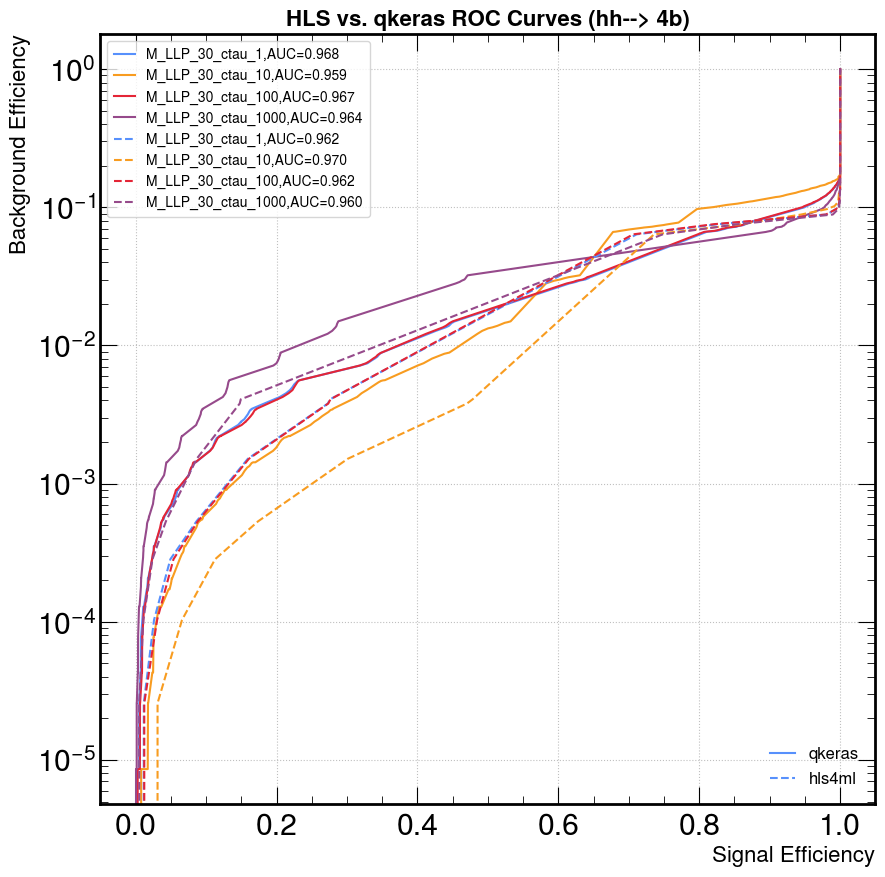

In [26]:
fig, ax = plt.subplots()
for key in results4b.keys():
    plt.plot(results4b[key]["tpr"], results4b[key]["fpr"],
            label="{},AUC={:.3f}".format(key, results4b[key]["auc"]))
plt.gca().set_prop_cycle(None)  # reset the colors
for i, key in enumerate(hls_results4b.keys()):
    print(key, i)
    plt.plot(hls_results4b[key]["tpr"], hls_results4b[key]["fpr"],
            label ="{},AUC={:.3f}".format(key, hls_results4b[key]["auc"]),
            linestyle ="--" )

plt.ylabel("Background Efficiency", fontsize=16)
plt.xlabel("Signal Efficiency", fontsize=16)
plt.title("HLS vs. qkeras ROC Curves (hh--> 4b)", fontsize=16, weight="bold")
plt.legend(loc="best", fontsize=10, frameon=True)
#plt.xscale("log")
plt.yscale("log")
plt.grid(True)

lines = [Line2D([0], [0], ls='-'), Line2D([0], [0], ls='--')]
from matplotlib.legend import Legend

leg = Legend(ax, lines, labels=['qkeras', 'hls4ml'], loc='lower right', frameon=False, fontsize=12)
ax.add_artist(leg)
plt.savefig("test4b.pdf", dpi=120)

### Plotting some things

In [27]:
import pandas as pd
import seaborn as sns

In [28]:
DF4b = pd.DataFrame.from_dict(scores4b, orient='index')
llpDF4b = pd.DataFrame.from_dict(llpFeats_scores4b, orient='index')

In [29]:
#Explode all lists to achieve row-column format
explodedDF4b = DF4b.explode(['eventNum', 'scores', 'labels', 'jetPt', 'jetEta', 'jetPhi', 'jetMass'])
exploded_llpDF4b = llpDF4b.explode(['eventNum', 'scores', 'llpPt', 'llpEta', 'llpPhi', 'llpMass'])

In [30]:
df4b = explodedDF4b[explodedDF4b["labels"]==1] #DF to study signal only
llp4b = exploded_llpDF4b[explodedDF4b["labels"]==1]

In [31]:
"""code to extract ctau values from index string in the dataframe"""

i = 0
digit = "0123456789"
ctaus = []
for idx, rows in llp4b.iterrows():
    #if i == 3: break
    #i += 1
    #print(idx)
    ctau = []
    j = 0
    for c, char in enumerate(idx):
        if char == "_":
            j += 1
        if j == 4 and char in digit:
            ctau.extend(char)
    ctau = "".join(ctau)
    #print(ctau)
    ctau = int(ctau)
    ctaus.append(ctau)


In [32]:
llp4b["ctau"] = ctaus

/tmp/ipykernel_1264936/2892891877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  llp4b["ctau"] = ctaus


In [47]:
llp4b["ctau"].value_counts()

ctau
10      23429
1       18674
100     18538
1000    15272
Name: count, dtype: int64

[Text(0, 0, '10'), Text(1, 0, '1'), Text(2, 0, '100'), Text(3, 0, '1000')]

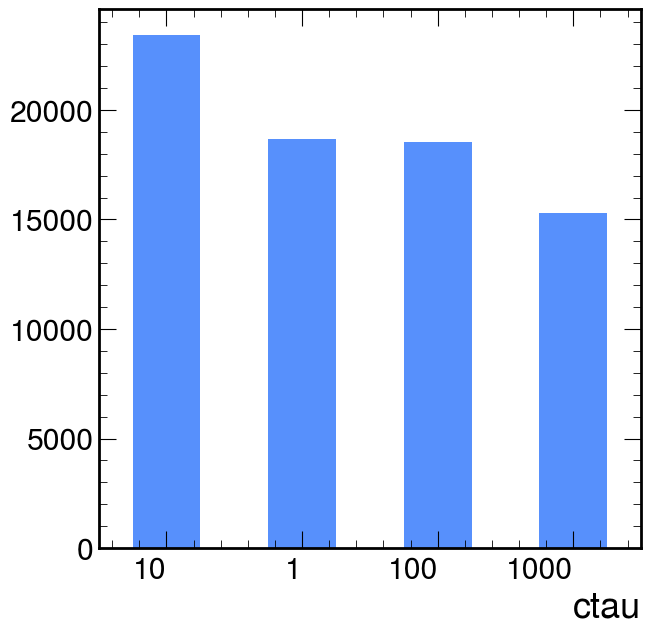

In [46]:
fig, ax = plt.subplots(figsize=(7,7))
llp4b["ctau"].value_counts().plot(kind="bar")
ax.set_xticklabels(llp4b["ctau"].value_counts().index, rotation=0, ha="right")

In [77]:
llp4b["llpMass"].unique()

array([30.000000000000014, 29.99999999999976, 30.000000000000032, 30.0,
       29.999999999999513, 30.00000000000006, 30.000000000000487,
       29.999999999999986, 29.99999999999903, 29.99999999999994,
       30.00000000000024, 30.00000000000012, 29.99999999999988,
       30.000000000000046, 29.999999999999908, 30.00000000000018,
       30.000000000000092, 29.999999999999968, 29.99999999999806,
       29.999999999999954, 30.00000000000097, 30.000000000000007,
       29.999999999999996, 29.99999999999927, 30.000000000000362,
       30.00000000000291, 30.00000000000002, 29.999999999999638,
       30.00000000000485, 29.999999999999993, 30.00000000000073,
       29.99999999999982, 30.000000000001457, 30.00000000000001,
       29.99999999999612, 30.00000000000194, 29.99999999999998,
       29.99999999999709, 29.999999999997573, 29.999999999999925,
       30.000000000000608, 29.999999999999698, 29.999999999998543,
       30.00000000000388, 30.000000000000153, 29.99999999999418,
       30.00

### kinematics

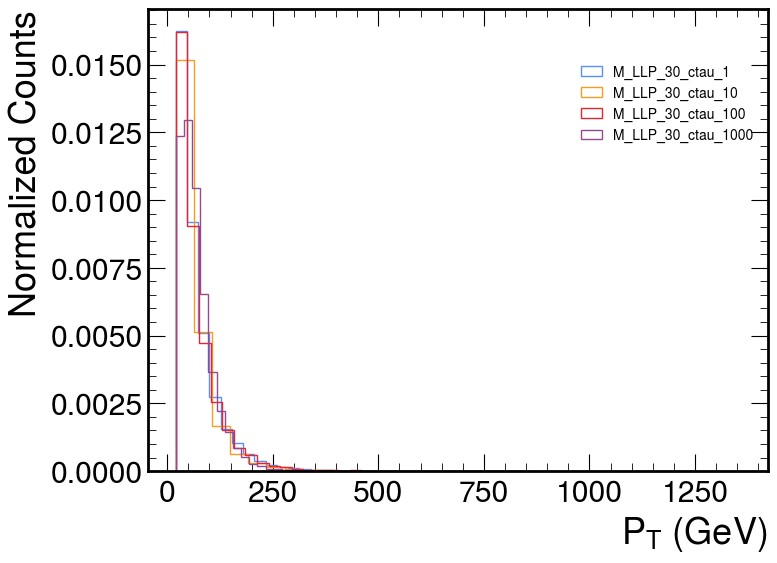

In [45]:
df = explodedDF[explodedDF["labels"]==1]

plt.figure(figsize=(8,6))

for idx, group in df.groupby(df.index):
  counts, bins, _ = plt.hist(
        group["jetPt"],
        bins=31,
        cumulative=False,
        density=True,
        histtype="step",
        label=str(idx), 
    )

plt.xlabel("$P_T$ (GeV)")
plt.ylabel("Normalized Counts")
plt.legend(title=" ", fontsize=10)
plt.show()

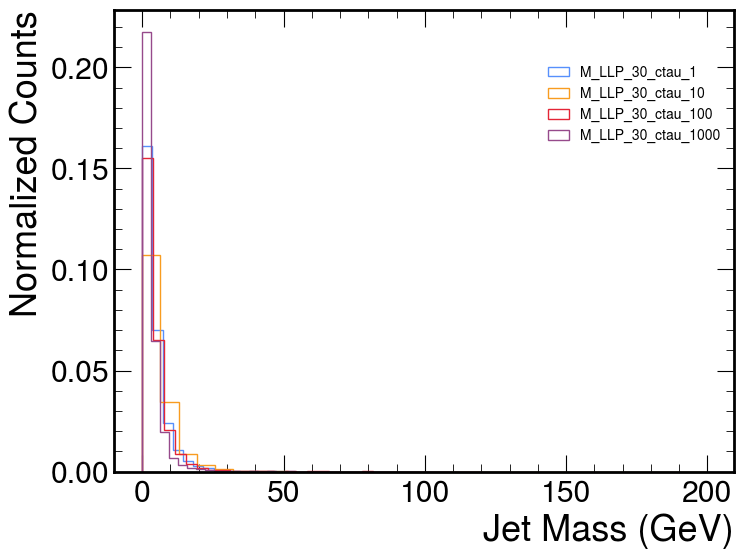

In [46]:
plt.figure(figsize=(8,6))

for idx, group in df.groupby(df.index):
  counts, bins, _ = plt.hist(
        group["jetMass"],
        bins=31,
        cumulative=False,
        density=True,
        histtype="step",
        label=str(idx), 
    )

plt.xlabel("Jet Mass (GeV)")
plt.ylabel("Normalized Counts")
plt.legend(title=" ", fontsize=10)
plt.show()

In [47]:
from matplotlib.colors import LogNorm

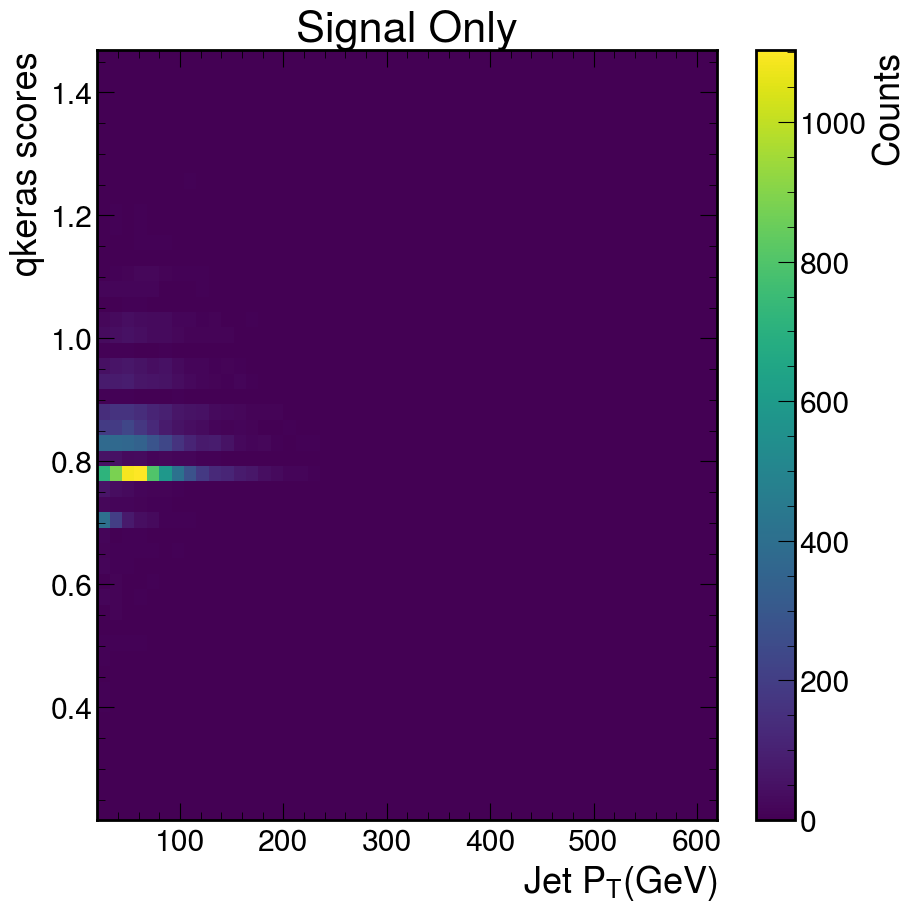

In [48]:
for idx, group in df.groupby(df.index):
   h = plt.hist2d(
        group["jetPt"], group["scores"],
        bins=[50, 50],
        cmap="viridis" ,
        #norm = LogNorm()
    )
plt.colorbar(label="Counts")
plt.xlabel(" Jet $P_T (GeV$)")
plt.ylabel("qkeras scores")
plt.title("Signal Only")
plt.show()

In [49]:
bin_width = (bins[-1] - bins[0]) / 31

In [50]:
sum(counts)*bin_width # Thus, histogram is normalized.

0.999999999999999

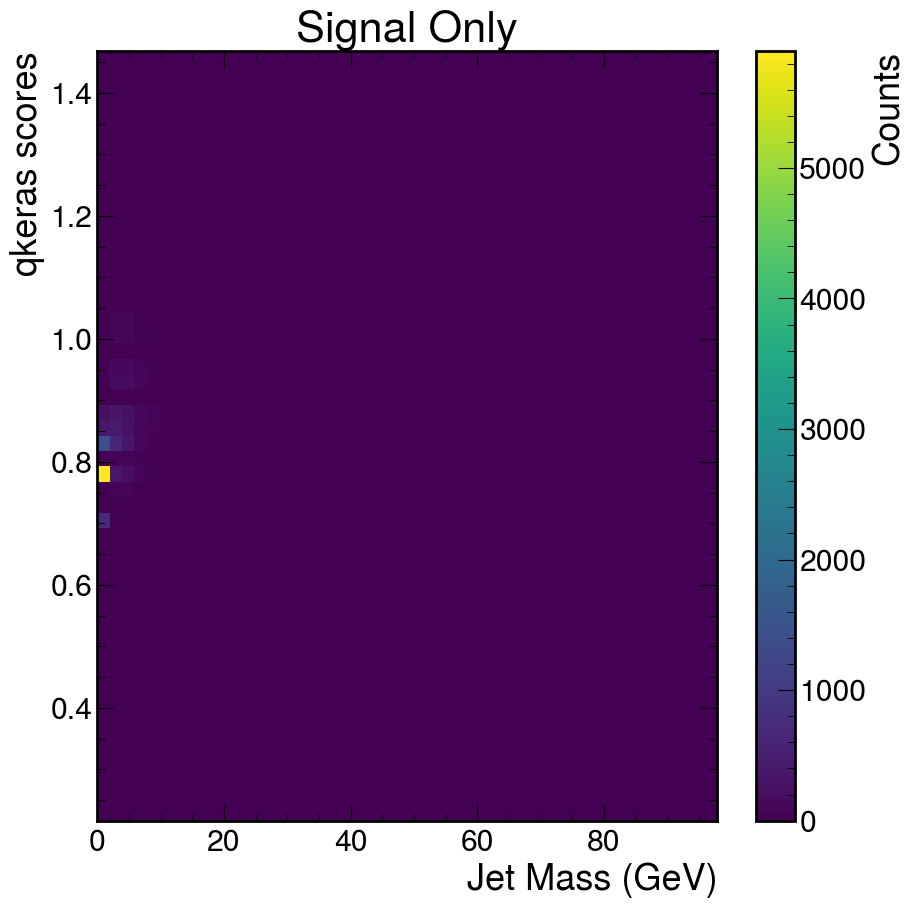

In [51]:
for idx, group in df.groupby(df.index):
   h = plt.hist2d(
        group["jetMass"], group["scores"],
        bins=[50, 50],
        cmap="viridis" ,
        #norm = LogNorm()
    )
plt.colorbar(label="Counts")
plt.xlabel("Jet Mass (GeV)")
plt.ylabel("qkeras scores")
plt.title("Signal Only")
plt.show()

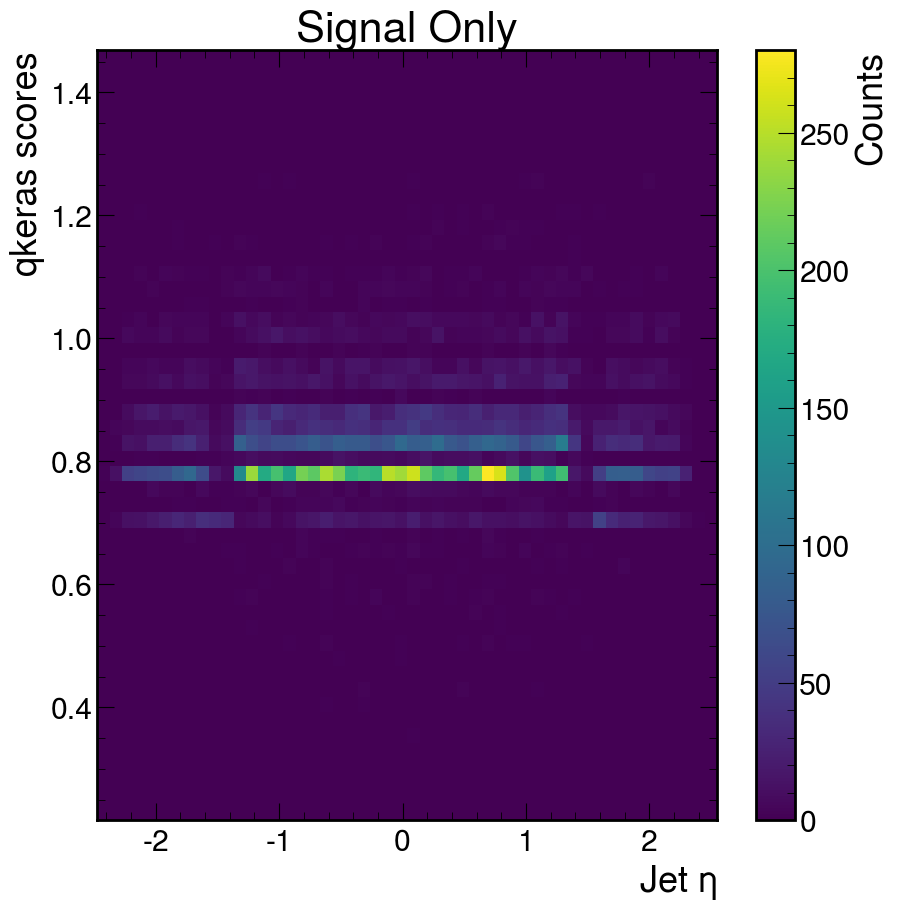

In [55]:
for idx, group in df.groupby(df.index):
   h = plt.hist2d(
        group["jetEta"], group["scores"],
        bins=[50, 50],
        cmap="viridis" ,
        #norm = LogNorm()
    )
plt.colorbar(label="Counts")
plt.xlabel("Jet $\eta$")
plt.ylabel("qkeras scores")
plt.title("Signal Only")
plt.show()

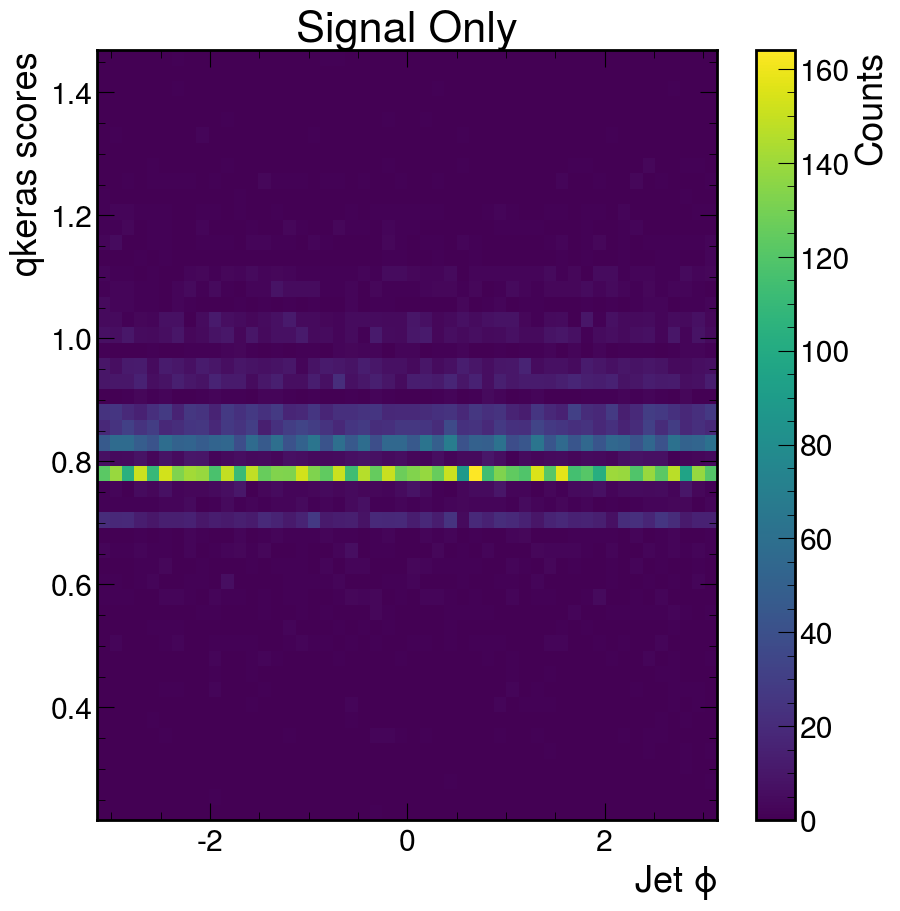

In [56]:
for idx, group in df.groupby(df.index):
   h = plt.hist2d(
        group["jetPhi"], group["scores"],
        bins=[50, 50],
        cmap="viridis" ,
        #norm = LogNorm()
    )
plt.colorbar(label="Counts")
plt.xlabel("Jet $\phi$")
plt.ylabel("qkeras scores")
plt.title("Signal Only")
plt.show()

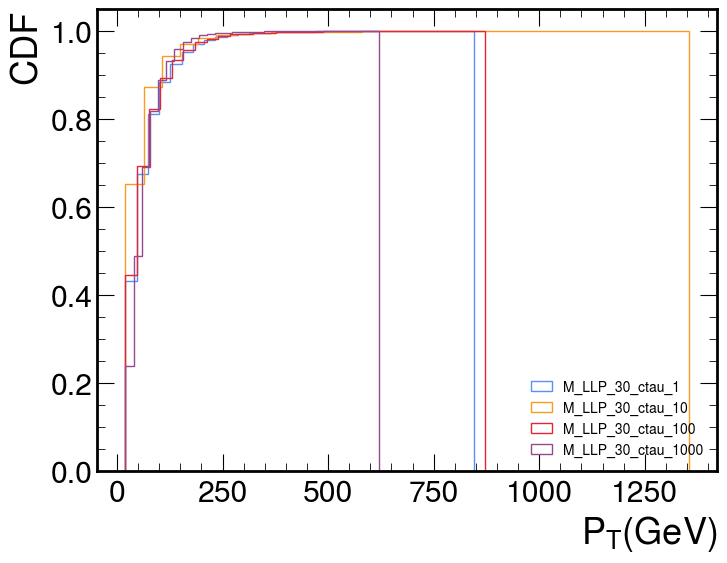

In [54]:
df = explodedDF[explodedDF["labels"]==1]

plt.figure(figsize=(8,6))

for idx, group in df.groupby(df.index):
    plt.hist(
        group["jetPt"],
        bins=31,
        cumulative=True,
        density=True,
        histtype="step",
        label=str(idx)
    )

plt.xlabel("$P_T (GeV)$")
plt.ylabel("CDF")
plt.legend(title=" ", fontsize=10)
plt.show()

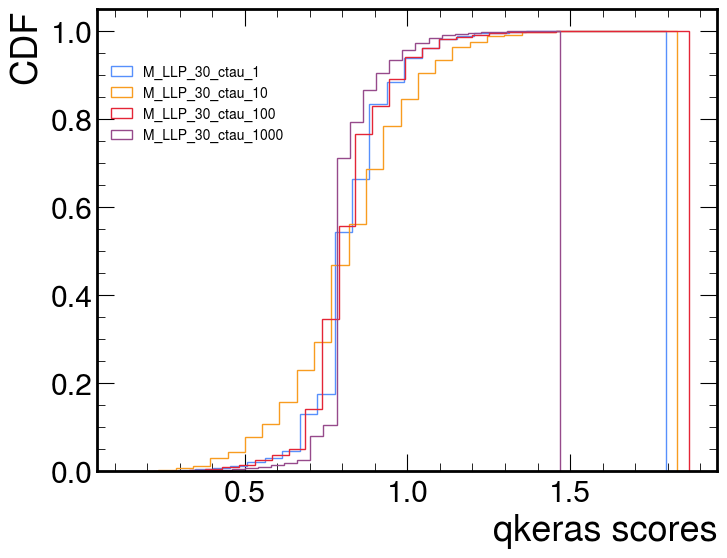

In [68]:
plt.figure(figsize=(8,6))

for idx, group in df.groupby(df.index):
    eff, bins_edges, _ = plt.hist(
        group["scores"],
        bins=31,
        cumulative=True,
        density=True,
        histtype="step",
        label=str(idx)
    )

plt.xlabel("qkeras scores")
plt.ylabel("CDF")
plt.legend(title=" ", fontsize=10)
plt.show()

### Based on the above CDF plot, apply a selection

Apply a selection at `qkeras_score >= 1.0` just to start (we need to find the correct LLP score based on the 14kHz rate, for example). Based on the CDF, we are accepting (keeping a proportion of data that has) `< 20%` total amount of jets. The results are shown below...

In [70]:
llpScore1_df = df.loc[df["scores"] >= 1.0]

In [73]:
len(llpScore1_df), len(df)

(7674, 74230)

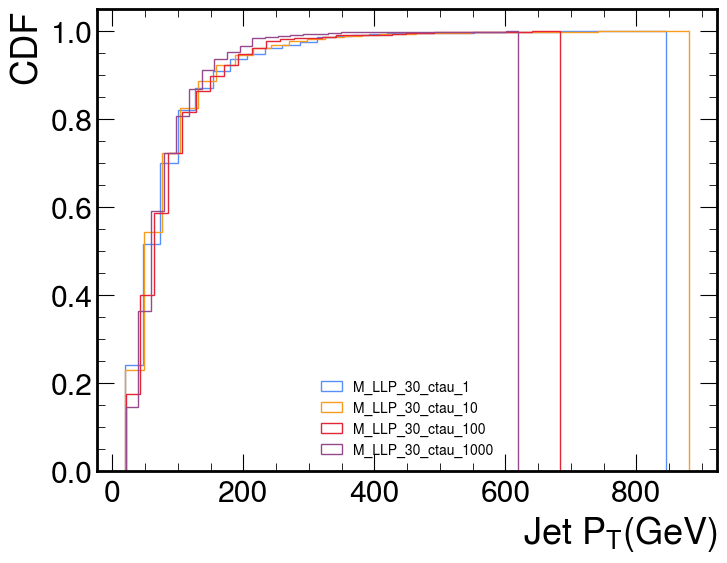

In [81]:
plt.figure(figsize=(8,6))

for idx, group in llpScore1_df.groupby(llpScore1_df.index):
    plt.hist(
        group["jetPt"],
        bins=31,
        cumulative=True,
        density=True,
        histtype="step",
        label=str(idx)
    )

plt.xlabel("Jet $P_T (GeV)$")
plt.ylabel("CDF")
plt.legend(title=" ", fontsize=10)
plt.show()

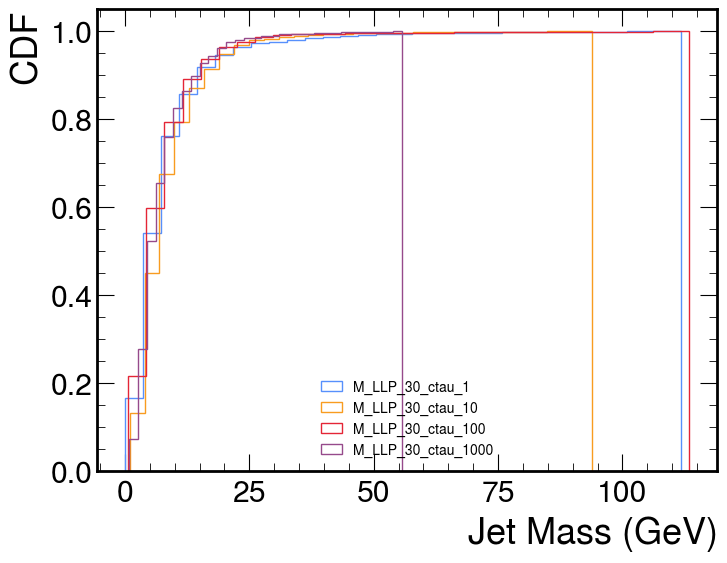

In [82]:
plt.figure(figsize=(8,6))

for idx, group in llpScore1_df.groupby(llpScore1_df.index):
    plt.hist(
        group["jetMass"],
        bins=31,
        cumulative=True,
        density=True,
        histtype="step",
        label=str(idx)
    )

plt.xlabel("Jet Mass $ (GeV)$")
plt.ylabel("CDF")
plt.legend(title=" ", fontsize=10)
plt.show()

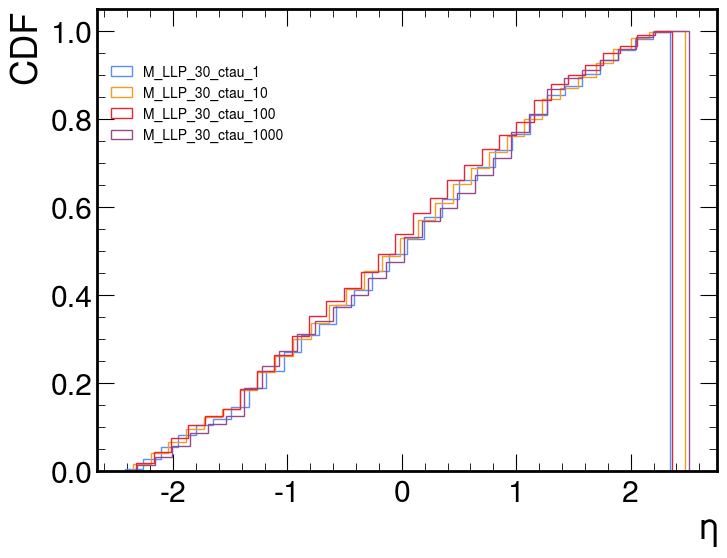

In [77]:
plt.figure(figsize=(8,6))

for idx, group in llpScore1_df.groupby(llpScore1_df.index):
    plt.hist(
        group["jetEta"],
        bins=31,
        cumulative=True,
        density=True,
        histtype="step",
        label=str(idx)
    )

plt.xlabel("$\eta$")
plt.ylabel("CDF")
plt.legend(title=" ", fontsize=10)
plt.show()

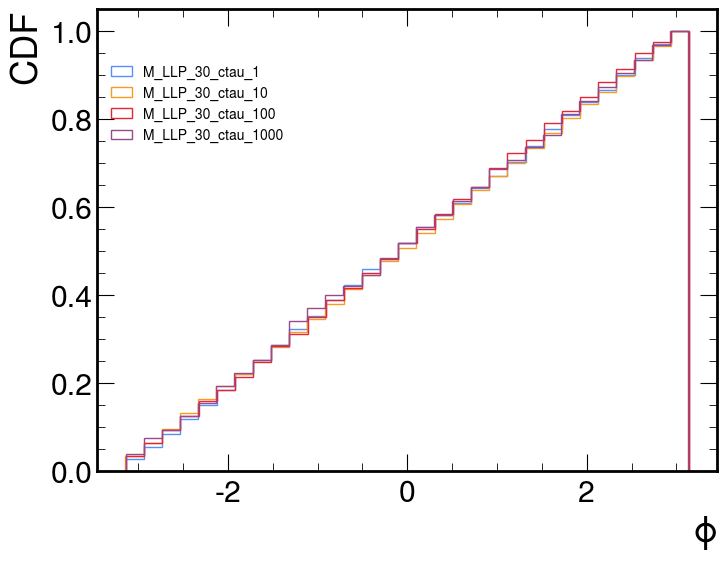

In [80]:
plt.figure(figsize=(8,6))

for idx, group in llpScore1_df.groupby(llpScore1_df.index):
    plt.hist(
        group["jetPhi"],
        bins=31,
        cumulative=True,
        density=True,
        histtype="step",
        label=str(idx)
    )

plt.xlabel("$\phi$")
plt.ylabel("CDF")
plt.legend(title=" ", fontsize=10)
plt.show()

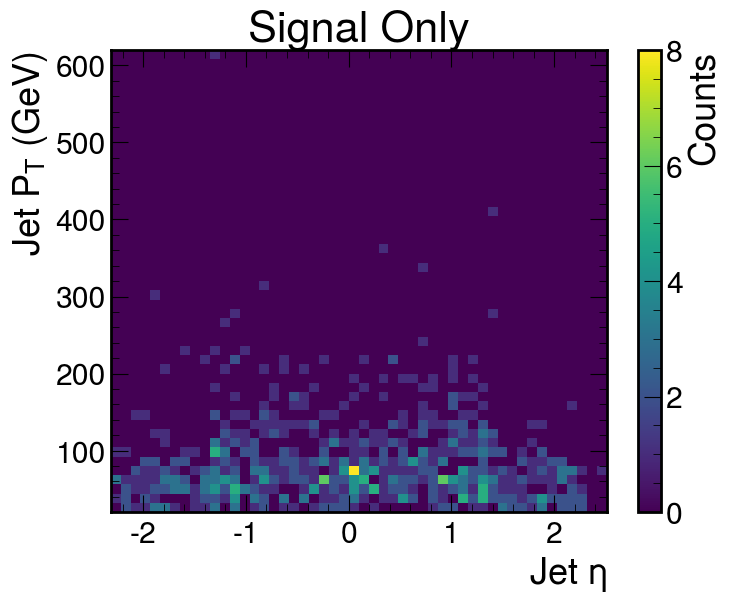

In [85]:
plt.figure(figsize=(8,6))

for idx, group in llpScore1_df.groupby(llpScore1_df.index):
   h = plt.hist2d(
        group["jetEta"], group["jetPt"],
        bins=[50, 50],
        cmap="viridis" ,
        #norm = LogNorm()
    )
plt.colorbar(label="Counts")
plt.xlabel("Jet $\eta$")
plt.ylabel("Jet $P_T $ (GeV)")
plt.title("Signal Only")
plt.show()

## Bkg plots

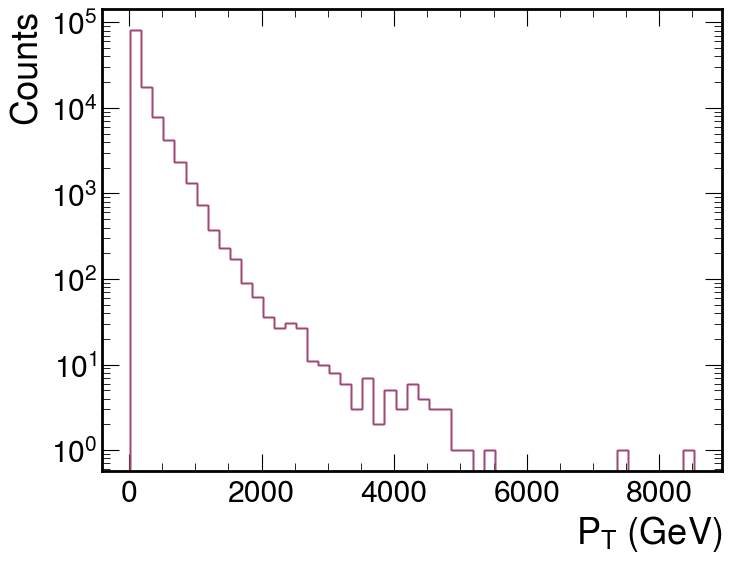

In [208]:
df_bkg = explodedDF.loc[explodedDF["labels"] == 0]

plt.figure(figsize=(8,6))

for idx, group in df_bkg.groupby(df_bkg.index):
  counts, bins, _ = plt.hist(
        group["JetPt"],
        bins=51,
        cumulative=False,
        density=False,
        histtype="step",
        label=str(idx), 
    )

plt.xlabel("$P_T$ (GeV)")
plt.ylabel("Counts")
plt.yscale("log")
#plt.legend(title=" Bkg in each LLP sample", fontsize=10)
plt.show()

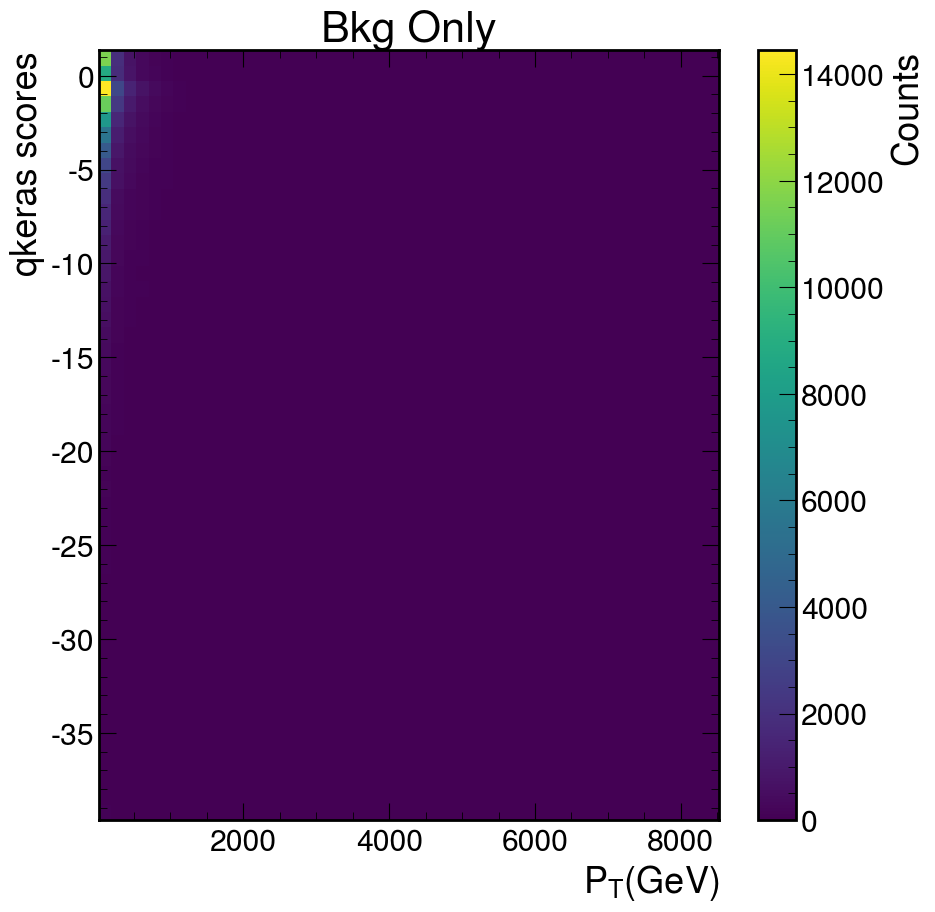

In [210]:
for idx, group in df_bkg.groupby(df_bkg.index):
   plt.hist2d(
        group["JetPt"], group["scores"],
        bins=[50, 50],
        cmap="viridis" ,
        #norm = LogNorm()
    )
plt.colorbar(label="Counts")
plt.xlabel("$P_T (GeV$)")
plt.ylabel("qkeras scores")
plt.title("Bkg Only", fontsize=16)
plt.show()

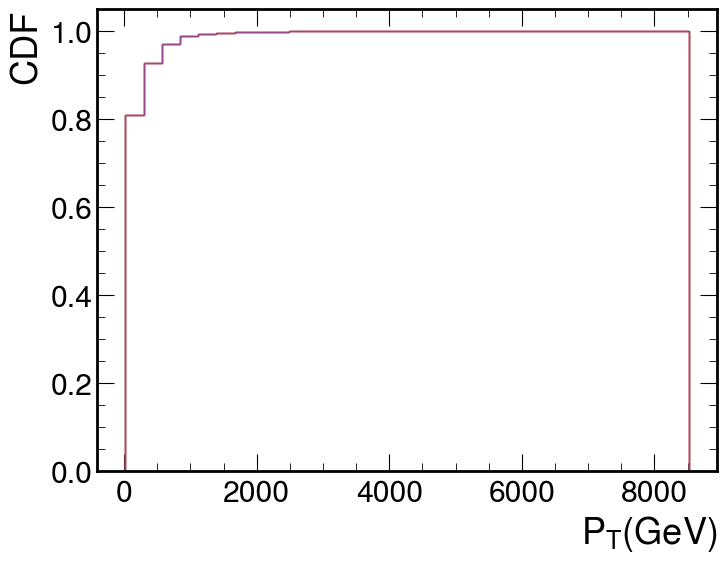

In [214]:
plt.figure(figsize=(8,6))

for idx, group in df_bkg.groupby(df_bkg.index):
    plt.hist(
        group["JetPt"],
        bins=31,
        cumulative=True,
        density=True,
        histtype="step",
        label=str(idx)
    )

plt.xlabel("$P_T (GeV)$")
plt.ylabel("CDF")
#plt.legend(title=" ", fontsize=10)
plt.show()

`Check definition of CDF. This is not right...`